<div align="center">

### Name: Tanuj Ranjith
### <span style ="color:#8c1515;"> Stanford Pre-Collegiate Summer Institutes (Intro to Machine Learning) </span>

<div>

#### Project Title: Adult
#### Dataset Link: https://archive.ics.uci.edu/dataset/2/adult

"Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset."

**Number of Instances:** 48842

**Variables:**

* Age
* Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* education:Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num:1 = Preschool, 2 = 1st-4th, 3 = 5th-6th, 4 = 7th-8th, 5 = 9th, 6 = 10th, 7 = 11th, 8 = 12th, 9 = HS-grad, 10 = Some-college, 11 = Assoc-voc, 12 = Assoc-acdm, 13 = Bachelors, 14 = Masters, 15 = Prof-school, 16 = Doctorate.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain:Capital gain is the profit made from selling an asset for more than you paid for it.
* capital-loss:Capital loss is the loss incurred when an asset is sold for less than its purchase price.
* hours-per-week
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income: >50K, <=50K.	

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy.stats as stats
from scipy.stats import skew, norm, probplot
from matplotlib.pyplot import boxplot
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [3]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
    'income'
]

df = pd.read_csv(r"D:\Desktop\coding\Internship & Summer program\Stanford summer program --- 2025\adult\adult.csv", header=None, names=column_names)


In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
file_path = r"D:\Desktop\coding\Internship & Summer program\Stanford summer program --- 2025\adult\adult.csv"
df = pd.read_csv(file_path)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' and col != 'income':
        df[col] = le.fit_transform(df[col])
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"\nColumn: {col}")
        print("Mapping:")
        for k, v in mapping.items():
            print(f"  {k} → {v}")
df.to_csv(file_path, index=False)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [5]:
df.head(15)

age  workclass  fnlwgt  education  education-num  marital-status  \
0    39          7   77516          9             13               4   
1    50          6   83311          9             13               2   
2    38          4  215646         11              9               0   
3    53          4  234721          1              7               2   
4    28          4  338409          9             13               2   
5    37          4  284582         12             14               2   
6    49          4  160187          6              5               3   
7    52          6  209642         11              9               2   
8    31          4   45781         12             14               4   
9    42          4  159449          9             13               2   
10   37          4  280464         15             10               2   
11   30          7  141297          9             13               2   
12   23          4  122272          9             13               4   
13   32          4  205019          7             12               4   
14   40          4  121772          8             11               2   

    occupation  relationship  race  sex  capital-gain  capital-loss  \
0            1             1     4    1          2174             0   
1            4             0     4    1             0             0   
2            6             1     4    1             0             0   
3            6             0     2    1             0             0   
4           10             5     2    0             0             0   
5            4             5     4    0             0             0   
6            8             1     2    0             0             0   
7            4             0     4    1             0             0   
8           10             1     4    0         14084             0   
9            4             0     4    1          5178             0   
10           4             0     2    1             0             0   
11          10             0     1    1             0             0   
12           1             3     4    0             0             0   
13          12             1     2    1             0             0   
14           3             0     1    1             0             0   

    hours-per-week  native-country  income  
0               40              39       0  
1               13              39       0  
2               40              39       0  
3               40              39       0  
4               40               5       0  
5               40              39       0  
6               16              23       0  
7               45              39       1  
8               50              39       1  
9               40              39       1  
10              80              39       1  
11              40              19       1  
12              30              39       0  
13              50              39       0  
14              40               0       1

In [6]:
df.tail()

age  workclass  fnlwgt  education  education-num  marital-status  \
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
32556          13             5     4    0             0             0   
32557           7             0     4    1             0             0   
32558           1             4     4    0             0             0   
32559           1             3     4    1             0             0   
32560           4             5     4    0         15024             0   

       hours-per-week  native-country  income  
32556              38              39       0  
32557              40              39       1  
32558              40              39       0  
32559              20              39       0  
32560              40              39       1

In [7]:
df.mean()

age                   38.581647
workclass              3.868892
fnlwgt            189778.366512
education             10.298210
education-num         10.080679
marital-status         2.611836
occupation             6.572740
relationship           1.446362
race                   3.665858
sex                    0.669205
capital-gain        1077.648844
capital-loss          87.303830
hours-per-week        40.437456
native-country        36.718866
income                 0.240810
dtype: float64

In [8]:
df.median()

age                   37.0
workclass              4.0
fnlwgt            178356.0
education             11.0
education-num         10.0
marital-status         2.0
occupation             7.0
relationship           1.0
race                   4.0
sex                    1.0
capital-gain           0.0
capital-loss           0.0
hours-per-week        40.0
native-country        39.0
income                 0.0
dtype: float64

In [9]:
df.mode()


age  workclass  fnlwgt  education  education-num  marital-status  \
0  36.0        4.0  123011       11.0            9.0             2.0   
1   NaN        NaN  164190        NaN            NaN             NaN   
2   NaN        NaN  203488        NaN            NaN             NaN   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0        10.0           0.0   4.0  1.0           0.0           0.0   
1         NaN           NaN   NaN  NaN           NaN           NaN   
2         NaN           NaN   NaN  NaN           NaN           NaN   

   hours-per-week  native-country  income  
0            40.0            39.0     0.0  
1             NaN             NaN     NaN  
2             NaN             NaN     NaN

In [10]:
df.std()

age                   13.640433
workclass              1.455960
fnlwgt            105549.977697
education              3.870264
education-num          2.572720
marital-status         1.506222
occupation             4.228857
relationship           1.606771
race                   0.848806
sex                    0.470506
capital-gain        7385.292085
capital-loss         402.960219
hours-per-week        12.347429
native-country         7.823782
income                 0.427581
dtype: float64

In [11]:
df.std()*3

age                   40.921298
workclass              4.367879
fnlwgt            316649.933091
education             11.610792
education-num          7.718161
marital-status         4.518665
occupation            12.686570
relationship           4.820313
race                   2.546417
sex                    1.411519
capital-gain       22155.876255
capital-loss        1208.880656
hours-per-week        37.042286
native-country        23.471346
income                 1.282744
dtype: float64

In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [13]:
df.shape


(32561, 15)

In [14]:
df.describe().T


count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
workclass       32561.0       3.868892       1.455960      0.0       4.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education       32561.0      10.298210       3.870264      0.0       9.0   
education-num   32561.0      10.080679       2.572720      1.0       9.0   
marital-status  32561.0       2.611836       1.506222      0.0       2.0   
occupation      32561.0       6.572740       4.228857      0.0       3.0   
relationship    32561.0       1.446362       1.606771      0.0       0.0   
race            32561.0       3.665858       0.848806      0.0       4.0   
sex             32561.0       0.669205       0.470506      0.0       0.0   
capital-gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital-loss    32561.0      87.303830     402.960219      0.0       0.0   
hours-per-week  32561.0      40.437456      12.347429      1.0      40.0   
native-country  32561.0      36.718866       7.823782      0.0      39.0   
income          32561.0       0.240810       0.427581      0.0       0.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
workclass            4.0       4.0        8.0  
fnlwgt          178356.0  237051.0  1484705.0  
education           11.0      12.0       15.0  
education-num       10.0      12.0       16.0  
marital-status       2.0       4.0        6.0  
occupation           7.0      10.0       14.0  
relationship         1.0       3.0        5.0  
race                 4.0       4.0        4.0  
sex                  1.0       1.0        1.0  
capital-gain         0.0       0.0    99999.0  
capital-loss         0.0       0.0     4356.0  
hours-per-week      40.0      45.0       99.0  
native-country      39.0      39.0       41.0  
income               0.0       0.0        1.0

In [15]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().T

count       mean        std       min        25%  \
age            32561.000     38.582     13.640    17.000     28.000   
workclass      32561.000      3.869      1.456     0.000      4.000   
fnlwgt         32561.000 189778.367 105549.978 12285.000 117827.000   
education      32561.000     10.298      3.870     0.000      9.000   
education-num  32561.000     10.081      2.573     1.000      9.000   
marital-status 32561.000      2.612      1.506     0.000      2.000   
occupation     32561.000      6.573      4.229     0.000      3.000   
relationship   32561.000      1.446      1.607     0.000      0.000   
race           32561.000      3.666      0.849     0.000      4.000   
sex            32561.000      0.669      0.471     0.000      0.000   
capital-gain   32561.000   1077.649   7385.292     0.000      0.000   
capital-loss   32561.000     87.304    402.960     0.000      0.000   
hours-per-week 32561.000     40.437     12.347     1.000     40.000   
native-country 32561.000     36.719      7.824     0.000     39.000   
income         32561.000      0.241      0.428     0.000      0.000   

                      50%        75%         max  
age                37.000     48.000      90.000  
workclass           4.000      4.000       8.000  
fnlwgt         178356.000 237051.000 1484705.000  
education          11.000     12.000      15.000  
education-num      10.000     12.000      16.000  
marital-status      2.000      4.000       6.000  
occupation          7.000     10.000      14.000  
relationship        1.000      3.000       5.000  
race                4.000      4.000       4.000  
sex                 1.000      1.000       1.000  
capital-gain        0.000      0.000   99999.000  
capital-loss        0.000      0.000    4356.000  
hours-per-week     40.000     45.000      99.000  
native-country     39.000     39.000      41.000  
income              0.000      0.000       1.000

In [16]:
df["hours-per-week"].value_counts()


hours-per-week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: count, Length: 94, dtype: int64

In [17]:
np.random.seed()
df.sample(n=15)

age  workclass  fnlwgt  education  education-num  marital-status  \
29035   45          4  185397          7             12               0   
19204   52          4  110563         15             10               2   
4830    52          4  188644          4              3               3   
14463   22          4  164775          6              5               4   
1012    50          4  767403         11              9               2   
14947   21          4  277408         15             10               4   
16991   37          2  593246          9             13               2   
6656    31          4  118941         15             10               0   
20881   44          4  221172         11              9               4   
1907    26          6  219897         12             14               4   
16722   24          4  376393          8             11               4   
23810   43          2  227734          8             11               2   
24517   22          4  213902         11              9               4   
5206    22          4   41763         15             10               4   
7191    52          4  172493         11              9               4   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
29035           3             1     4    1             0             0   
19204           4             0     4    1             0             0   
4830            3             2     4    1             0             0   
14463           7             4     4    1             0             0   
1012            7             0     4    1          3103             0   
14947           8             4     4    0             0             0   
16991          10             5     4    0             0             0   
6656            8             3     4    0             0             0   
20881           3             1     4    1             0             0   
1907           10             1     4    0             0             0   
16722          12             1     4    0             0             0   
23810          14             0     4    1             0             0   
24517           1             4     4    0             0             0   
5206            8             1     4    1             0             0   
7191           12             1     4    0             0             0   

       hours-per-week  native-country  income  
29035              40              39       0  
19204              40              39       1  
4830               40              26       0  
14463              40              13       0  
1012               40              39       1  
14947              35              39       0  
16991              50              39       1  
6656               20              39       0  
20881              30              39       0  
1907               50              39       0  
16722              40              39       0  
23810              22              39       0  
24517              40              26       0  
5206               25              39       0  
7191               36              39       0

In [18]:
df[df.duplicated()].count()


age               24
workclass         24
fnlwgt            24
education         24
education-num     24
marital-status    24
occupation        24
relationship      24
race              24
sex               24
capital-gain      24
capital-loss      24
hours-per-week    24
native-country    24
income            24
dtype: int64

In [19]:
df.corr()


age  workclass  fnlwgt  education  education-num  \
age             1.000      0.004  -0.077     -0.011          0.037   
workclass       0.004      1.000  -0.017      0.024          0.052   
fnlwgt         -0.077     -0.017   1.000     -0.028         -0.043   
education      -0.011      0.024  -0.028      1.000          0.359   
education-num   0.037      0.052  -0.043      0.359          1.000   
marital-status -0.266     -0.065   0.028     -0.038         -0.069   
occupation     -0.021      0.255   0.002     -0.021          0.110   
relationship   -0.264     -0.090   0.009     -0.011         -0.094   
race            0.029      0.050  -0.021      0.014          0.032   
sex             0.089      0.096   0.027     -0.027          0.012   
capital-gain    0.078      0.034   0.000      0.030          0.123   
capital-loss    0.058      0.012  -0.010      0.017          0.080   
hours-per-week  0.069      0.139  -0.019      0.056          0.148   
native-country -0.001     -0.008  -0.052      0.064          0.051   
income          0.234      0.052  -0.009      0.079          0.335   

                marital-status  occupation  relationship   race    sex  \
age                     -0.266      -0.021        -0.264  0.029  0.089   
workclass               -0.065       0.255        -0.090  0.050  0.096   
fnlwgt                   0.028       0.002         0.009 -0.021  0.027   
education               -0.038      -0.021        -0.011  0.014 -0.027   
education-num           -0.069       0.110        -0.094  0.032  0.012   
marital-status           1.000      -0.010         0.185 -0.068 -0.129   
occupation              -0.010       1.000        -0.076  0.007  0.080   
relationship             0.185      -0.076         1.000 -0.116 -0.582   
race                    -0.068       0.007        -0.116  1.000  0.087   
sex                     -0.129       0.080        -0.582  0.087  1.000   
capital-gain            -0.043       0.026        -0.058  0.011  0.048   
capital-loss            -0.034       0.018        -0.061  0.019  0.046   
hours-per-week          -0.191       0.080        -0.249  0.042  0.229   
native-country          -0.024      -0.013        -0.006  0.138 -0.008   
income                  -0.199       0.075        -0.251  0.072  0.216   

                capital-gain  capital-loss  hours-per-week  native-country  \
age                    0.078         0.058           0.069          -0.001   
workclass              0.034         0.012           0.139          -0.008   
fnlwgt                 0.000        -0.010          -0.019          -0.052   
education              0.030         0.017           0.056           0.064   
education-num          0.123         0.080           0.148           0.051   
marital-status        -0.043        -0.034          -0.191          -0.024   
occupation             0.026         0.018           0.080          -0.013   
relationship          -0.058        -0.061          -0.249          -0.006   
race                   0.011         0.019           0.042           0.138   
sex                    0.048         0.046           0.229          -0.008   
capital-gain           1.000        -0.032           0.078          -0.002   
capital-loss          -0.032         1.000           0.054           0.000   
hours-per-week         0.078         0.054           1.000          -0.003   
native-country        -0.002         0.000          -0.003           1.000   
income                 0.223         0.151           0.230           0.016   

                income  
age              0.234  
workclass        0.052  
fnlwgt          -0.009  
education        0.079  
education-num    0.335  
marital-status  -0.199  
occupation       0.075  
relationship    -0.251  
race             0.072  
sex              0.216  
capital-gain     0.223  
capital-loss     0.151  
hours-per-week   0.230  
native-country   0.016  
income           1.000

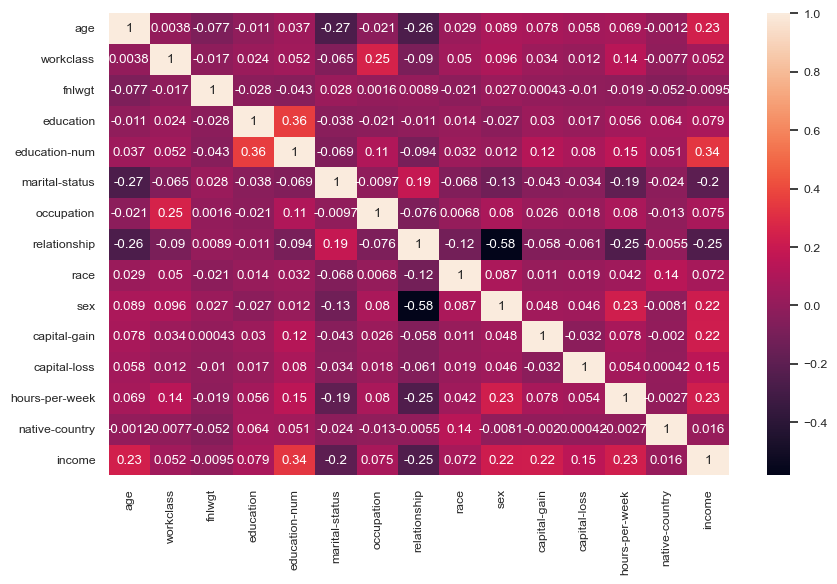

In [20]:
plt.figure(figsize=(10,6))
sns.set(font_scale=0.8)
plt.rcParams["axes.labelsize"] = 0.5
sns.heatmap(df.corr(), annot=True);
plt.show();

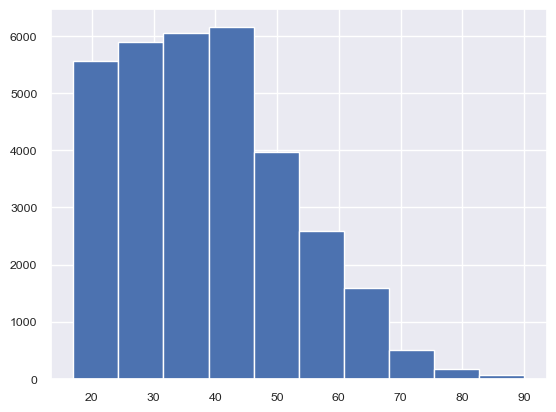

In [21]:
plt.hist(df["age"], color='b');
plt.show();

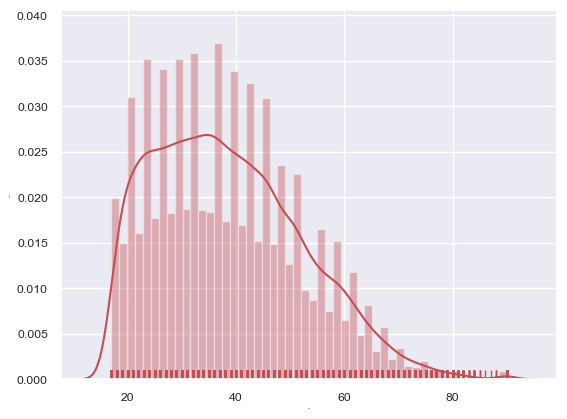

In [22]:
sns.distplot(df["age"], color='r', rug=True);
plt.show();

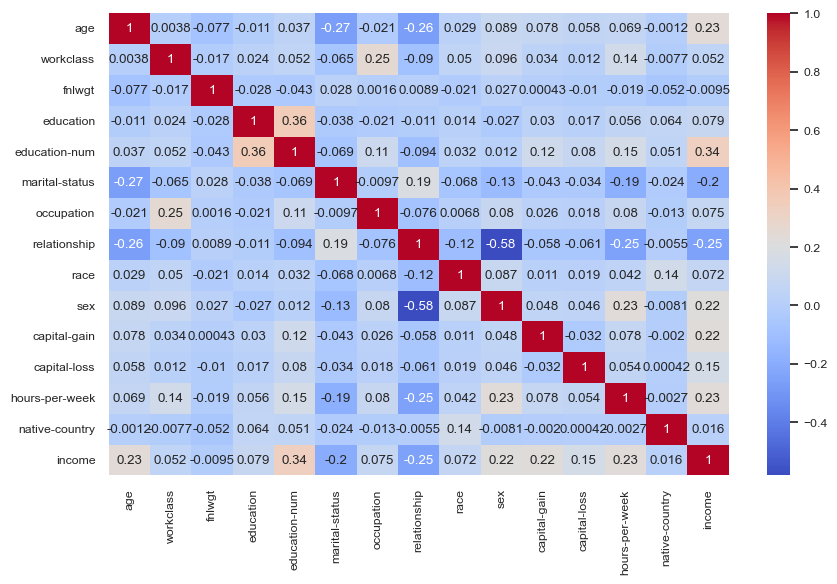

In [23]:
# Pearson's correlation (with heatmap and coolwarm color)
plt.figure(figsize=(10,6))
sns.set(font_scale=0.8)
plt.rcParams["axes.labelsize"] = 0.5
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");
plt.show()

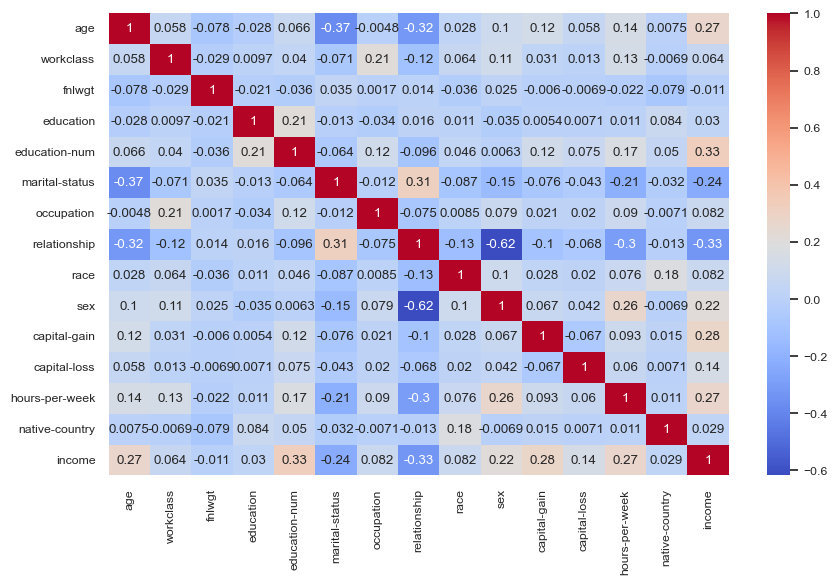

In [24]:
# Spearman's Rank or Spearman's Rho correlation
plt.figure(figsize=(10,6))
sns.set(font_scale=0.8)
plt.rcParams["axes.labelsize"] = 0.5
sns.heatmap(df.corr(method='spearman'), annot=True, cmap="coolwarm"); # nonparametric correlation
plt.show()

In [25]:
! pip install phik
import phik
from phik import resources, report

In [26]:
df.phik_matrix()


interval columns not set, guessing: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


age  workclass  fnlwgt  education  education-num  \
age            1.000      0.253   0.080      0.291          0.311   
workclass      0.253      1.000   0.046      0.143          0.184   
fnlwgt         0.080      0.046   1.000      0.051          0.058   
education      0.291      0.143   0.051      1.000          0.991   
education-num  0.311      0.184   0.058      0.991          1.000   
marital-status 0.502      0.158   0.045      0.140          0.163   
occupation     0.300      0.497   0.051      0.405          0.526   
relationship   0.474      0.194   0.033      0.185          0.215   
race           0.064      0.094   0.158      0.137          0.164   
sex            0.160      0.153   0.037      0.085          0.121   
capital-gain   0.110      0.104   0.000      0.121          0.188   
capital-loss   0.100      0.074   0.000      0.060          0.088   
hours-per-week 0.437      0.255   0.041      0.231          0.274   
native-country 0.079      0.058   0.150      0.401          0.433   
income         0.412      0.179   0.008      0.334          0.469   

                marital-status  occupation  relationship  race   sex  \
age                      0.502       0.300         0.474 0.064 0.160   
workclass                0.158       0.497         0.194 0.094 0.153   
fnlwgt                   0.045       0.051         0.033 0.158 0.037   
education                0.140       0.405         0.185 0.137 0.085   
education-num            0.163       0.526         0.215 0.164 0.121   
marital-status           1.000       0.236         0.678 0.130 0.431   
occupation               0.236       1.000         0.297 0.170 0.488   
relationship             0.678       0.297         1.000 0.144 0.843   
race                     0.130       0.170         0.144 1.000 0.096   
sex                      0.431       0.488         0.843 0.096 1.000   
capital-gain             0.062       0.108         0.118 0.012 0.067   
capital-loss             0.113       0.067         0.128 0.019 0.071   
hours-per-week           0.230       0.380         0.298 0.142 0.315   
native-country           0.109       0.203         0.126 0.567 0.056   
income                   0.417       0.407         0.623 0.082 0.333   

                capital-gain  capital-loss  hours-per-week  native-country  \
age                    0.110         0.100           0.437           0.079   
workclass              0.104         0.074           0.255           0.058   
fnlwgt                 0.000         0.000           0.041           0.150   
education              0.121         0.060           0.231           0.401   
education-num          0.188         0.088           0.274           0.433   
marital-status         0.062         0.113           0.230           0.109   
occupation             0.108         0.067           0.380           0.203   
relationship           0.118         0.128           0.298           0.126   
race                   0.012         0.019           0.142           0.567   
sex                    0.067         0.071           0.315           0.056   
capital-gain           1.000         0.000           0.105           0.023   
capital-loss           0.000         1.000           0.058           0.005   
hours-per-week         0.105         0.058           1.000           0.079   
native-country         0.023         0.005           0.079           1.000   
income                 0.377         0.201           0.359           0.104   

                income  
age              0.412  
workclass        0.179  
fnlwgt           0.008  
education        0.334  
education-num    0.469  
marital-status   0.417  
occupation       0.407  
relationship     0.623  
race             0.082  
sex              0.333  
capital-gain     0.377  
capital-loss     0.201  
hours-per-week   0.359  
native-country   0.104  
income           1.000

In [27]:
from phik.report import plot_correlation_matrix
phik_overview = df.phik_matrix()


interval columns not set, guessing: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


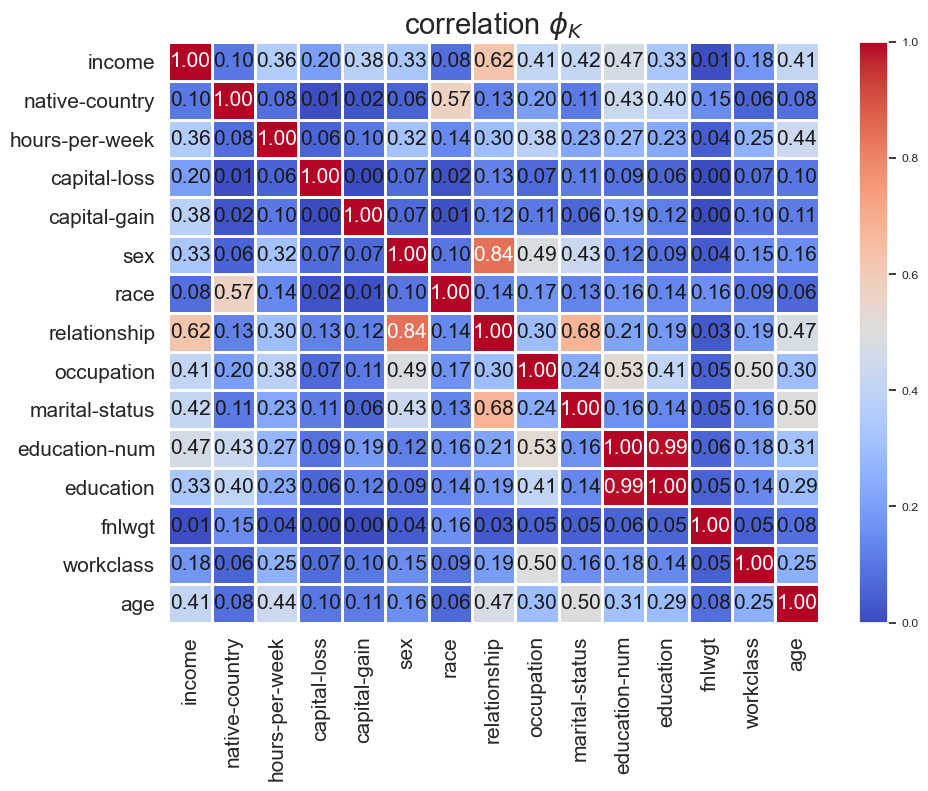

In [28]:
# Presenting Phi K data as a heatmap (credit: Jai Gupta, Stanford SPCS 2023)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()
plt.show()

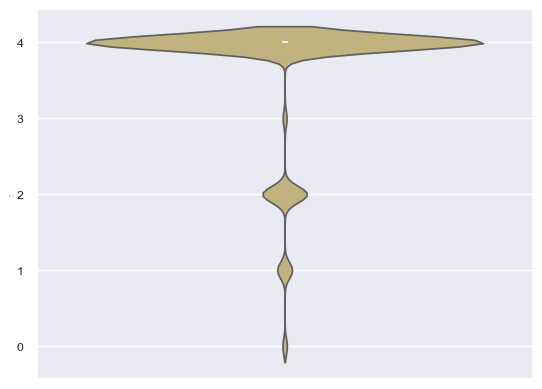

In [29]:
sns.violinplot(df['race'],color='y');
plt.show()

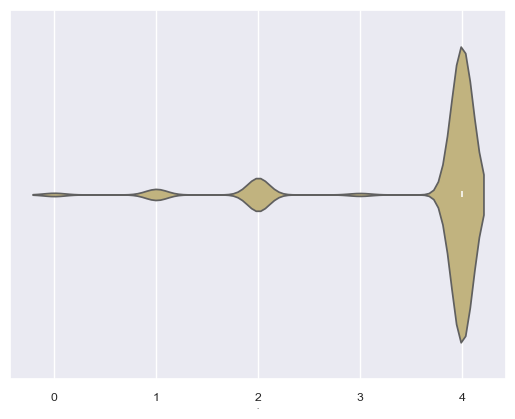

In [30]:
sns.violinplot(x=df['race'],color='y'); # Note inclusion of "x=" to rotate the plot
plt.show()

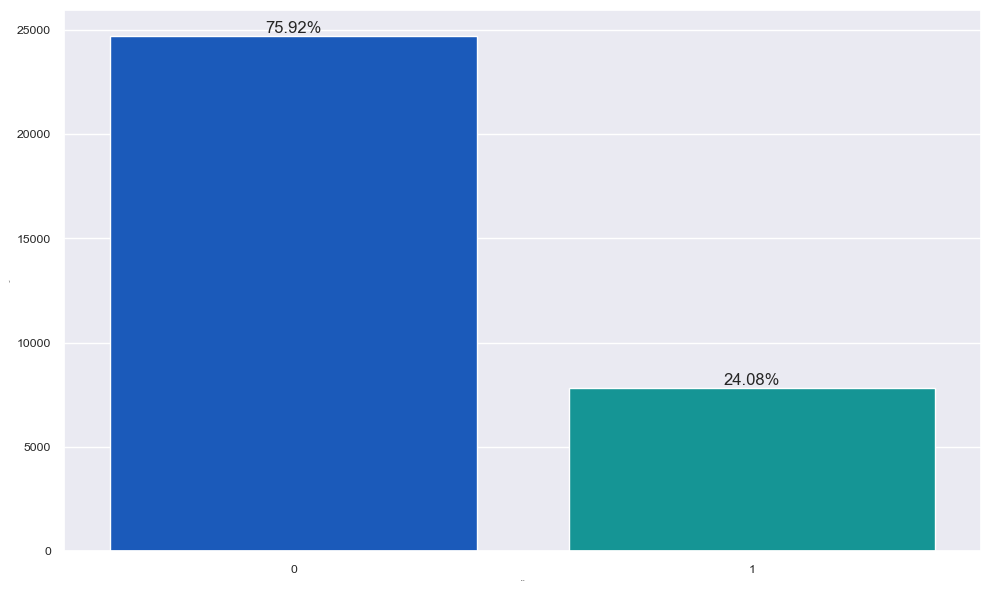

In [31]:
# Function to create plot for categorical variable

# Annotate barplot
def annotate_bars(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', size=12)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='income', palette='winter', ax=ax)
annotate_bars(ax, df['income'])
plt.tight_layout()
plt.show()

In [32]:
# From UT Austin Computer Science Department
# Use this function to create a combo boxplot and histogram for continuous (I/R --> int64 and float64) variables

def boxplot_histogram (feature, figsize=(10,7), bins = None):
    sns.set(font_scale=2) 
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, 
                                           sharex = True,
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    sns.boxplot(feature, ax=ax_box2, orient = "h", showmeans=True, color='red') # mean value will be noted
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2, fit=norm)
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    plt.axvline(feature.mode()[0], color='r', linestyle='dashed', linewidth=1); #Add mode to the histogram

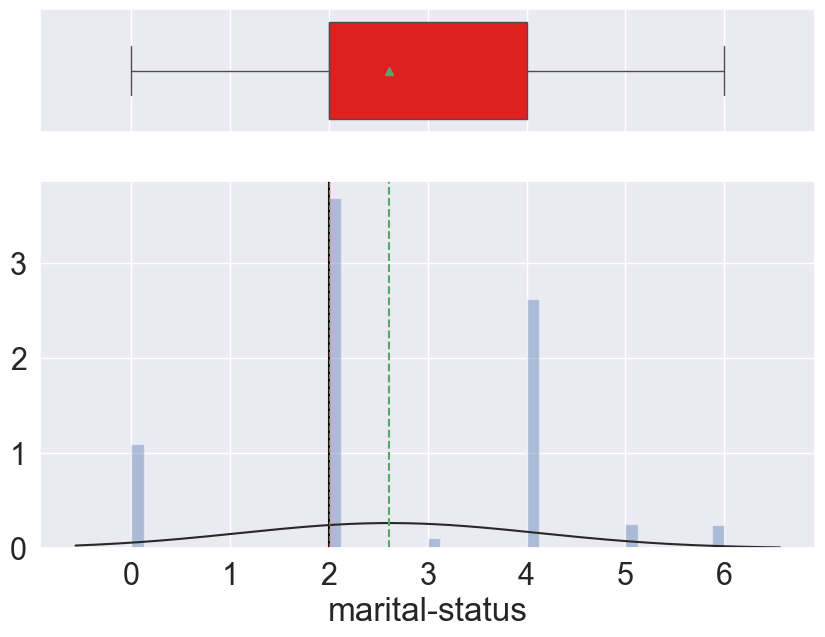

In [33]:
boxplot_histogram(df['marital-status'])
plt.show()


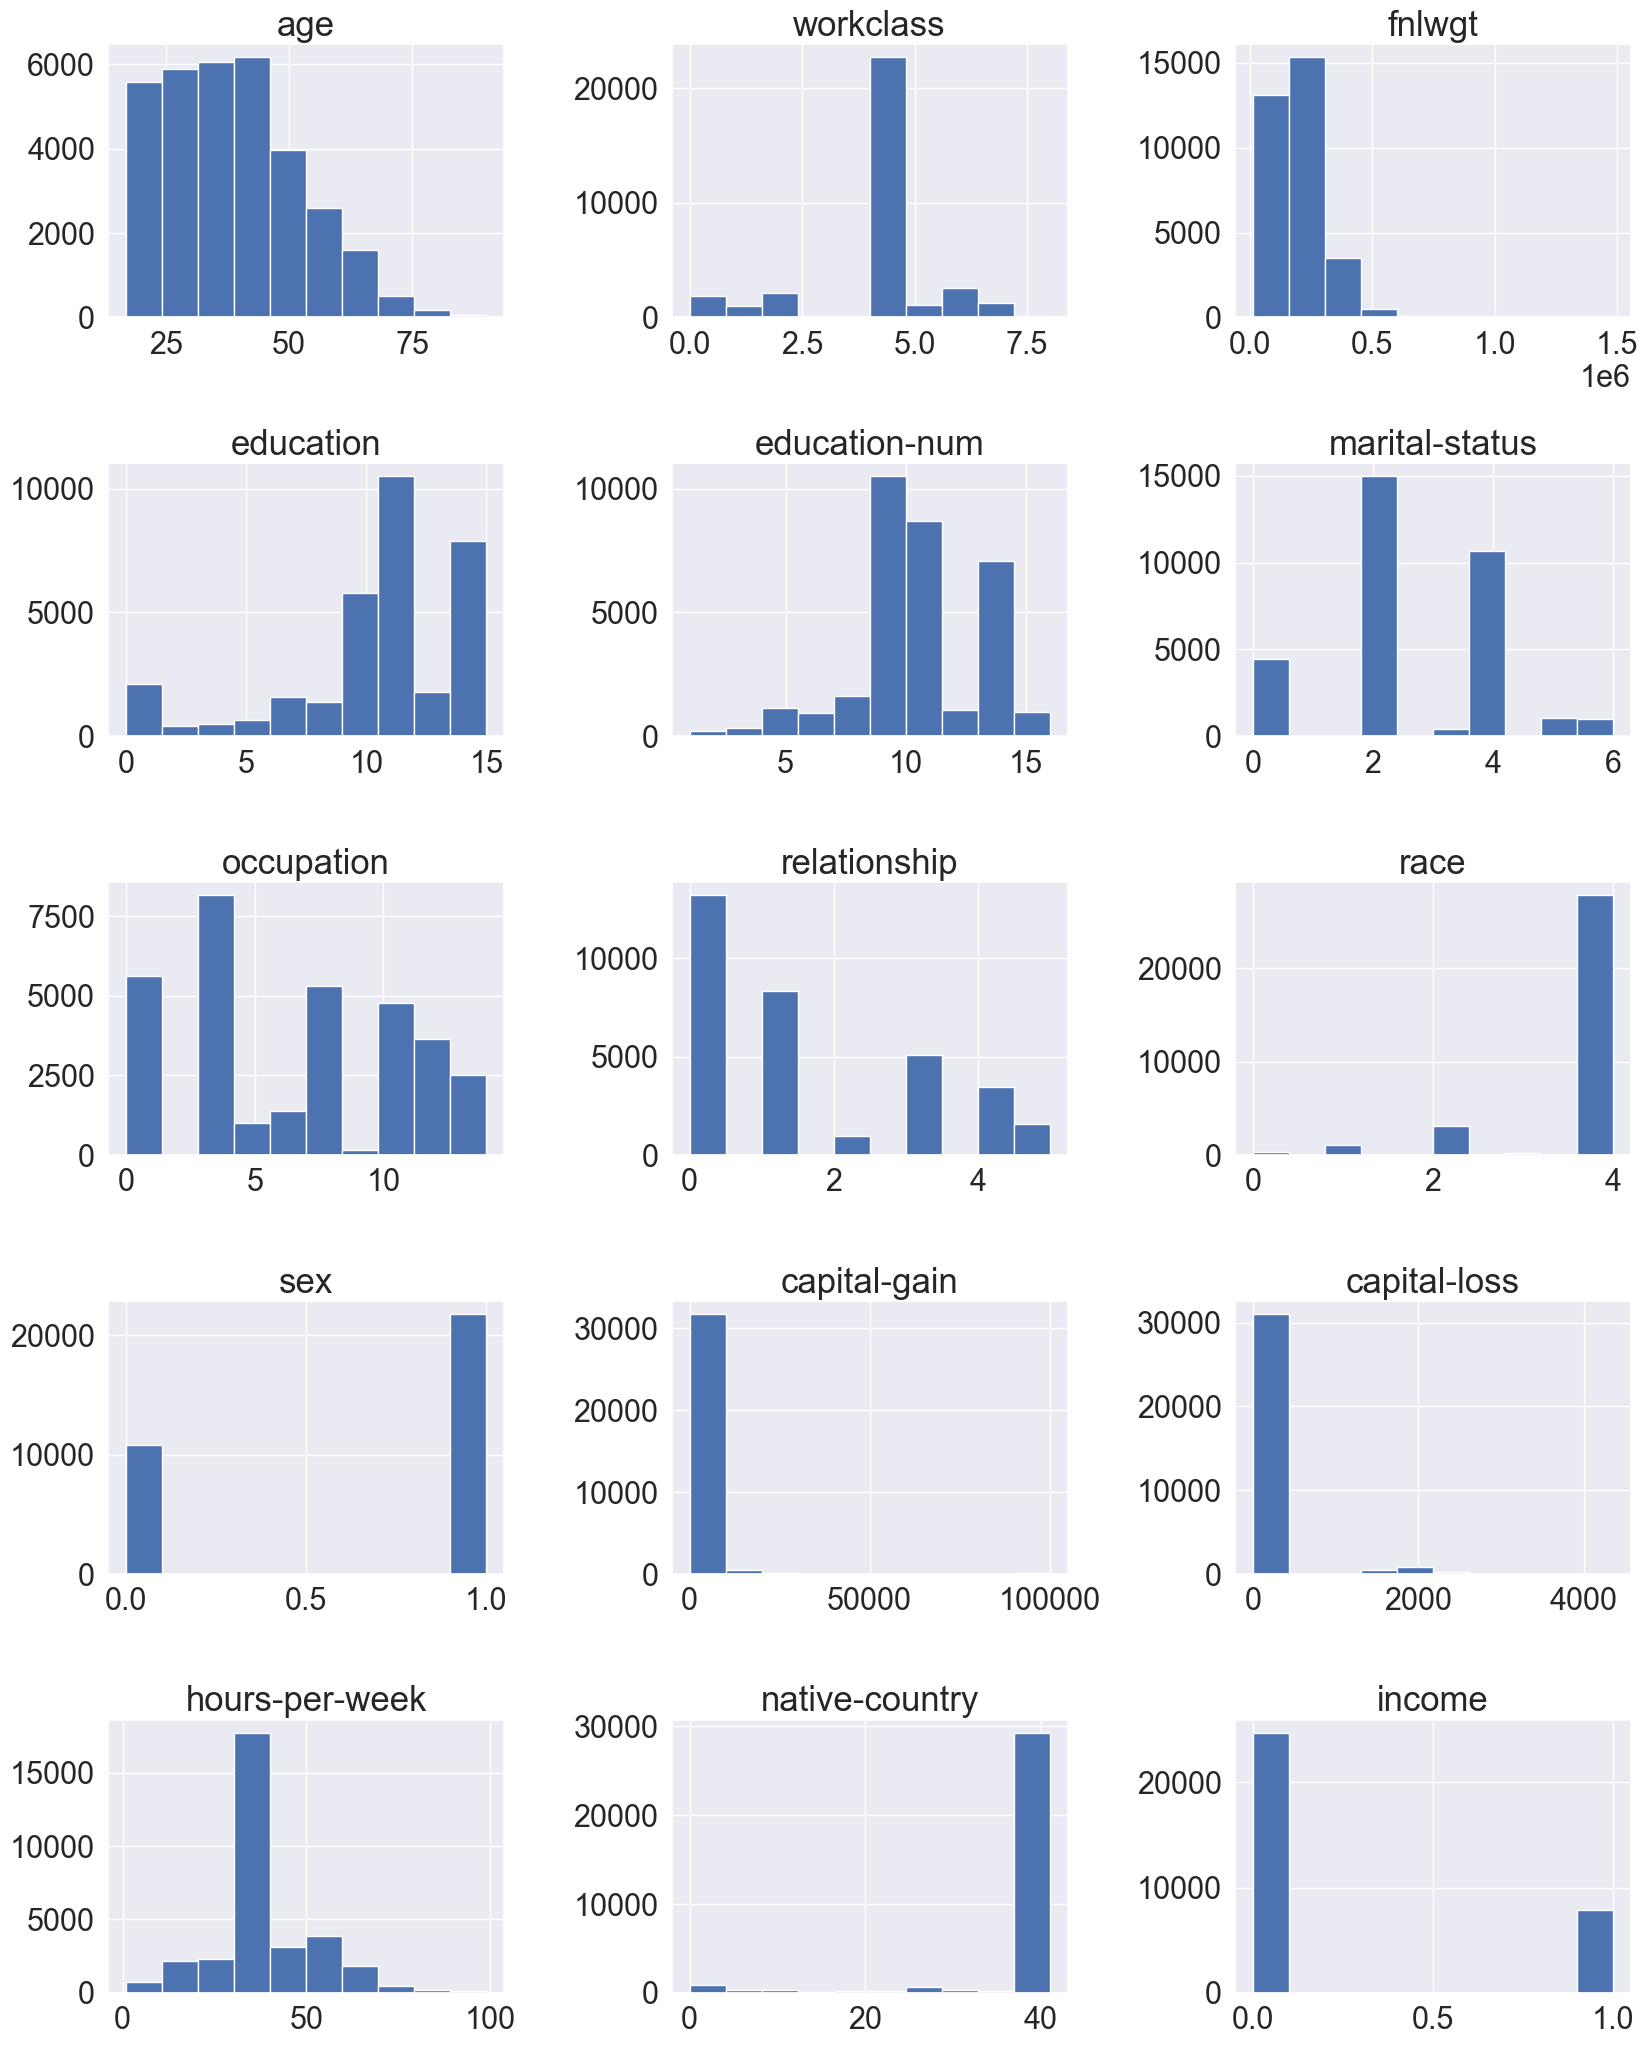

In [34]:
# Plot histograms to check the distribution of each numeric variable
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    
plt.show()

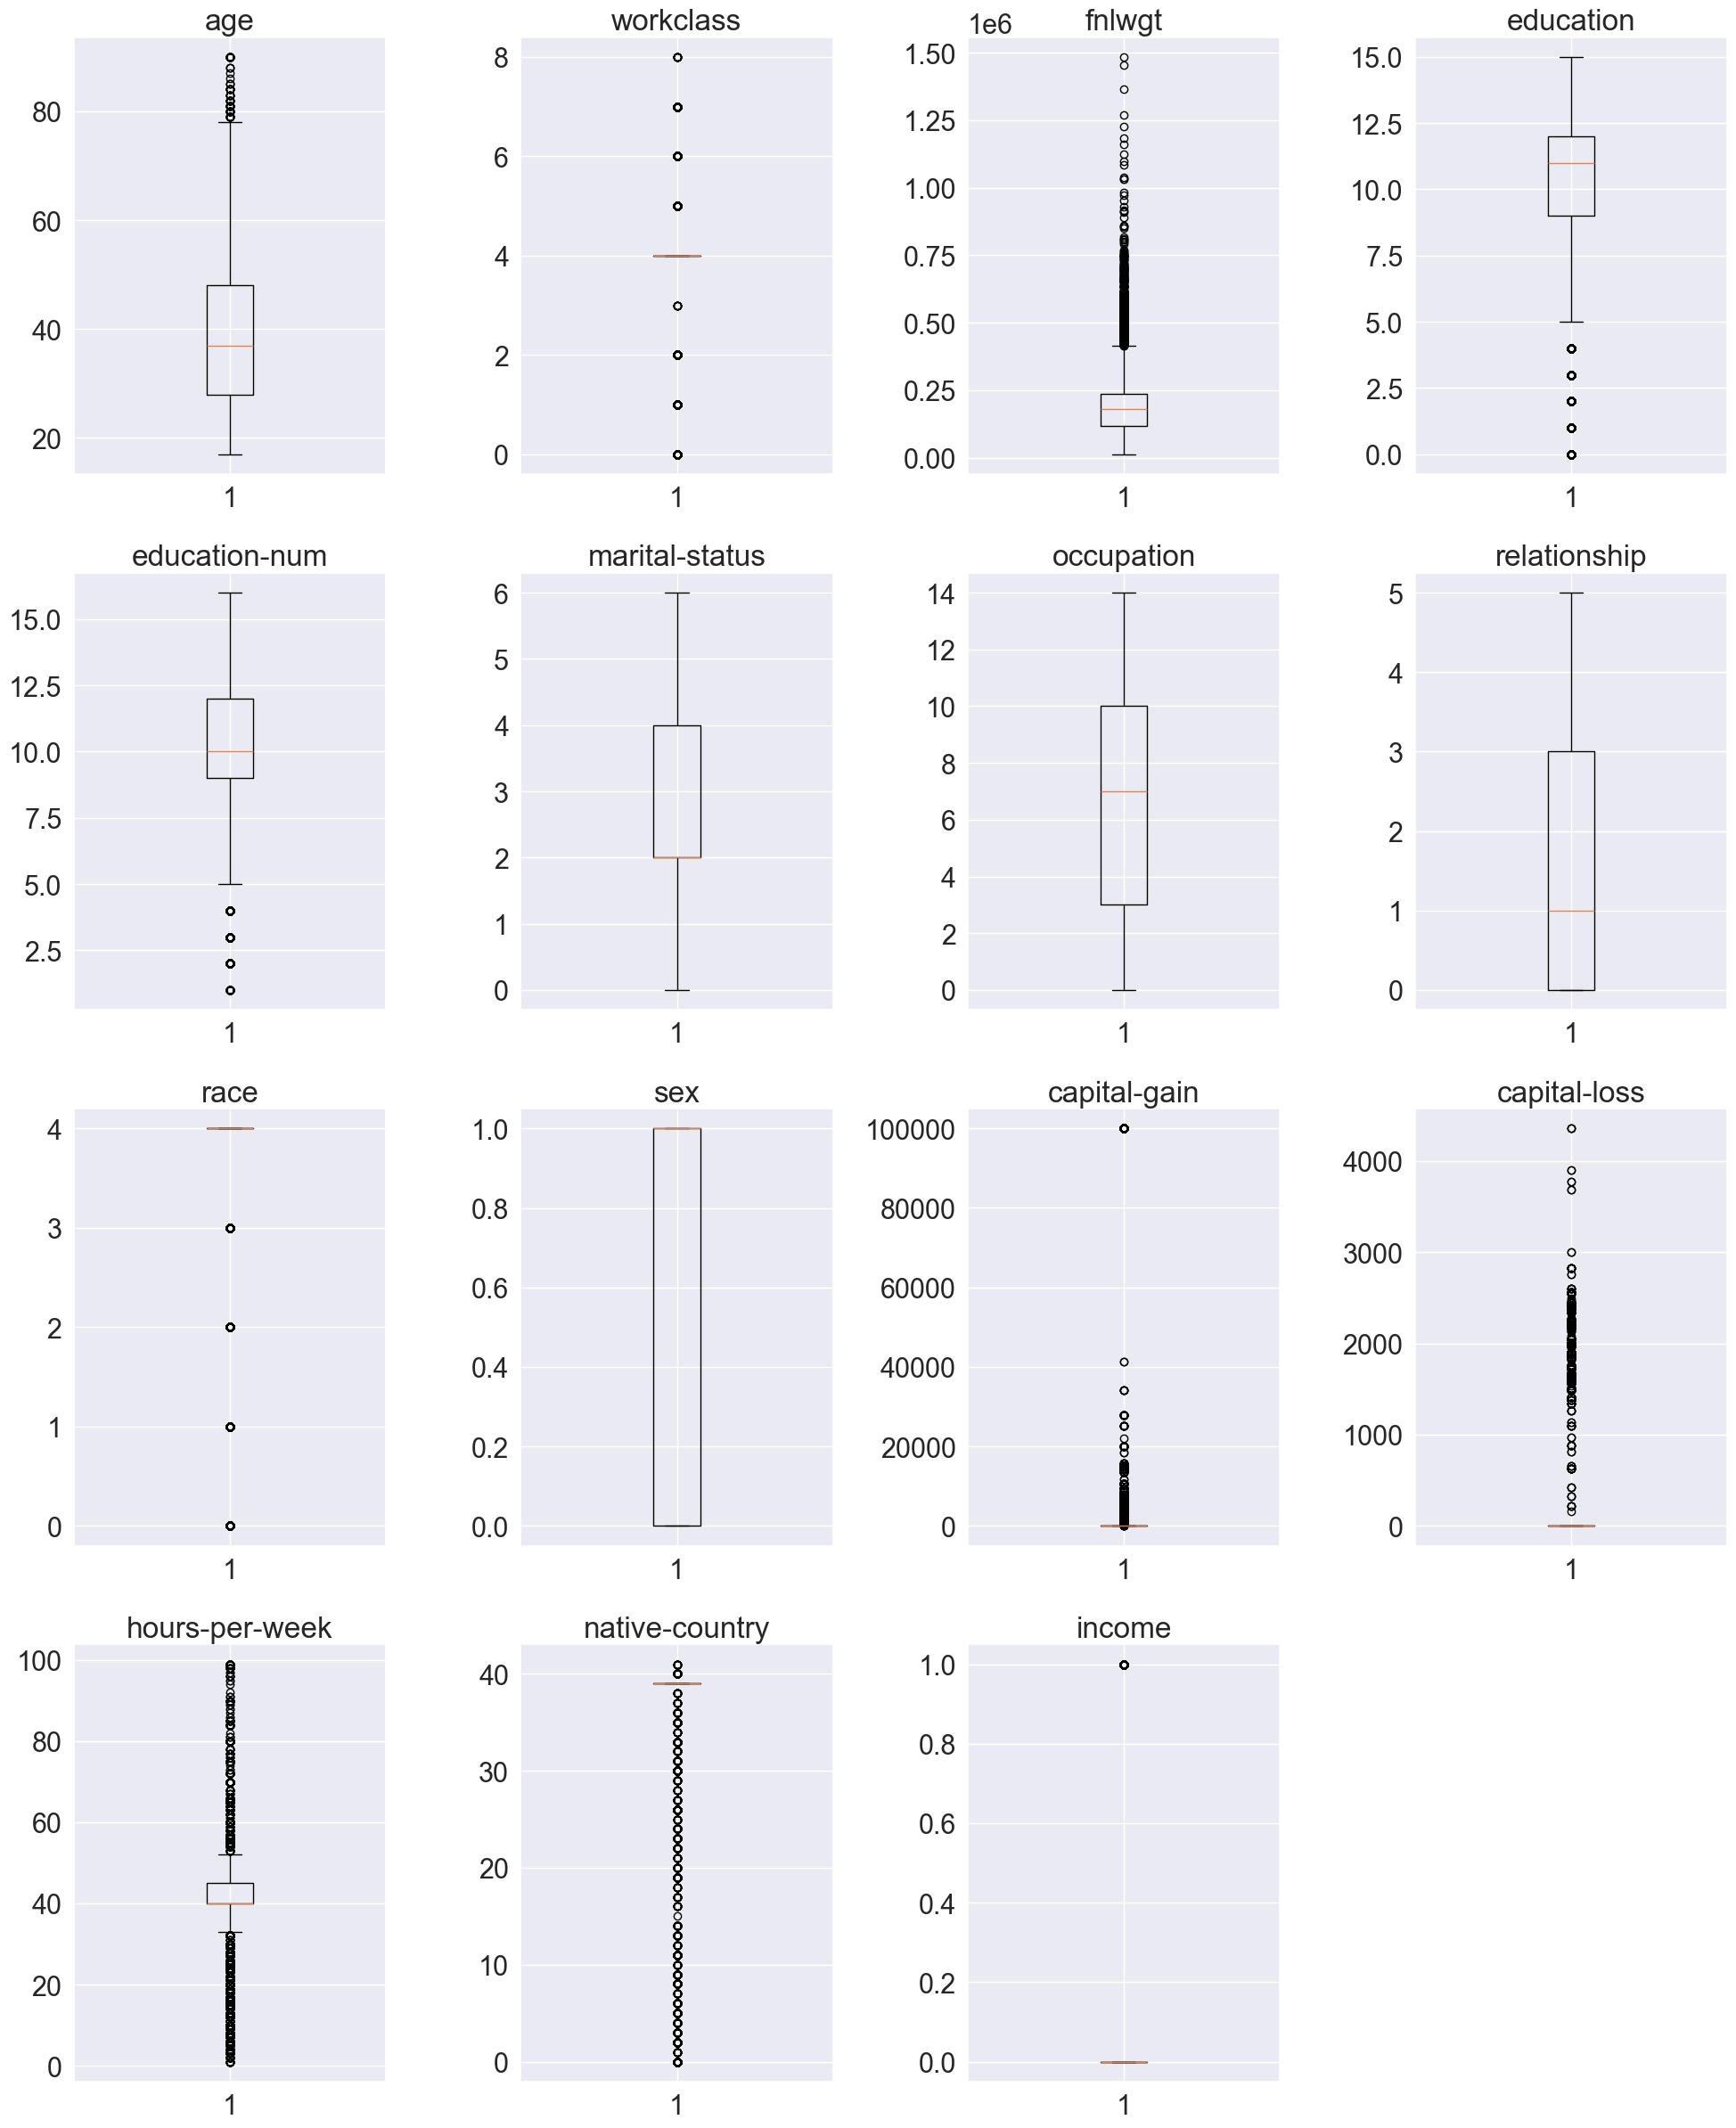

In [35]:
# Outlier detection using boxplots (for all I/R variables)
plt.figure(figsize=(20,30))

for i, variable in enumerate(df): #enumerate is a built-in function in python that allows you to keep track of the number of iterations (loops) in a loop
                     plt.subplot(5,4,i+1) #provides a way to plot multiple plots on a single figure
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)
                    
plt.show()

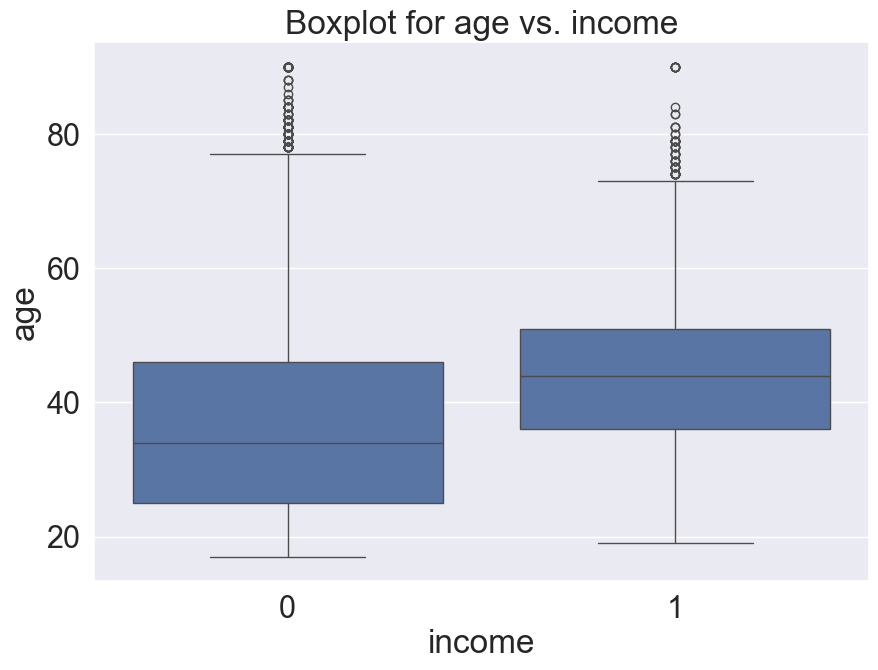

In [36]:
# Boxplot with DV and 1 IV
# sns.boxplot(x = "categorical_var", y = "numeric_var", data = df)
# plt.title('graph_title')
# plt.show()

plt.figure(figsize=(10,7))
sns.boxplot(x = "income", y = "age", data = df)
plt.title('Boxplot for age vs. income')
plt.show()

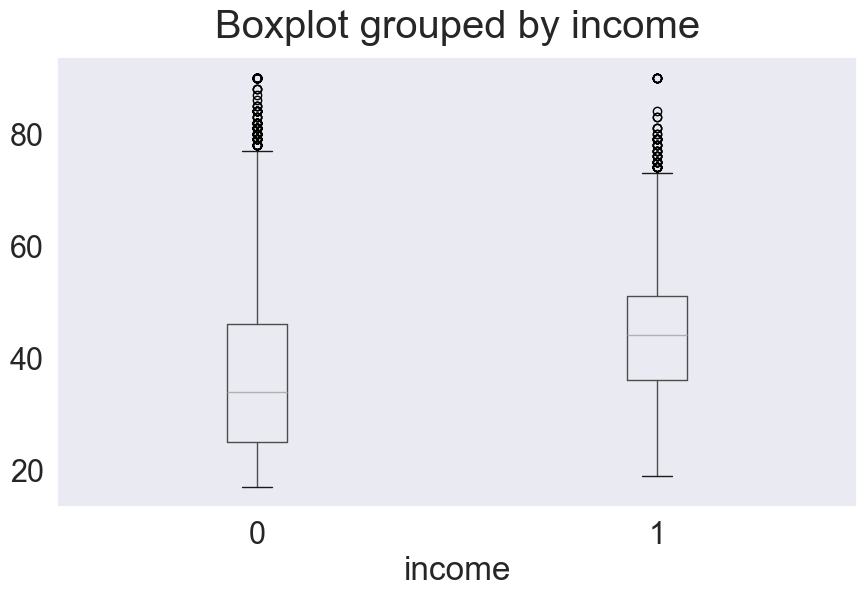

In [37]:
ttest_boxplot = df.boxplot(column='age', by='income', figsize=(10, 6), grid=False);
ttest_boxplot.set_title('');
ttest_boxplot.set_ylabel('');
plt.show()

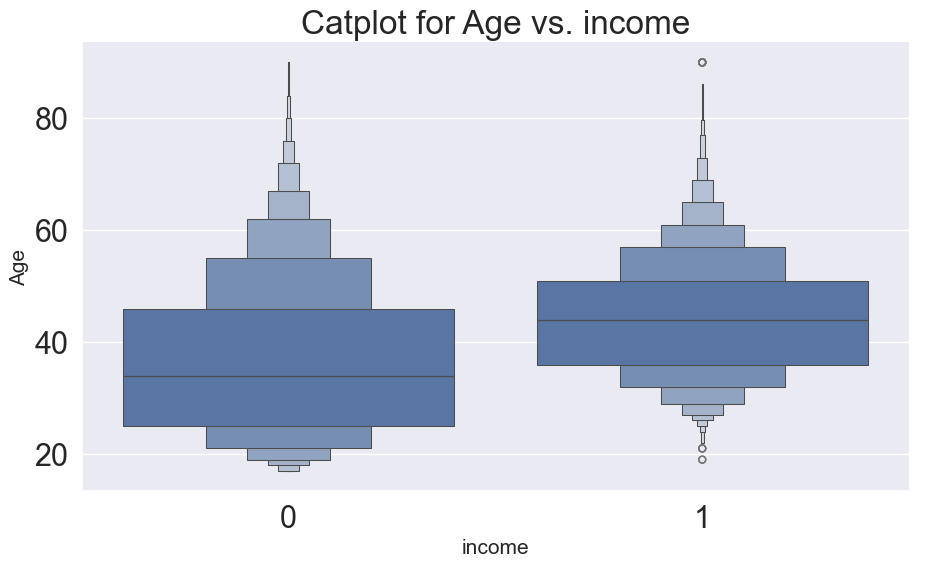

In [38]:
# Catplot
sns.catplot(x="income", y="age", data=df, kind='boxen', height=6, aspect=1.6, estimator=np.mean);
figsize=(10, 6)
plt.xlabel('income', fontsize=15);
plt.title('Catplot for Age vs. income')
plt.ylabel('Age', fontsize=15);
plt.show()

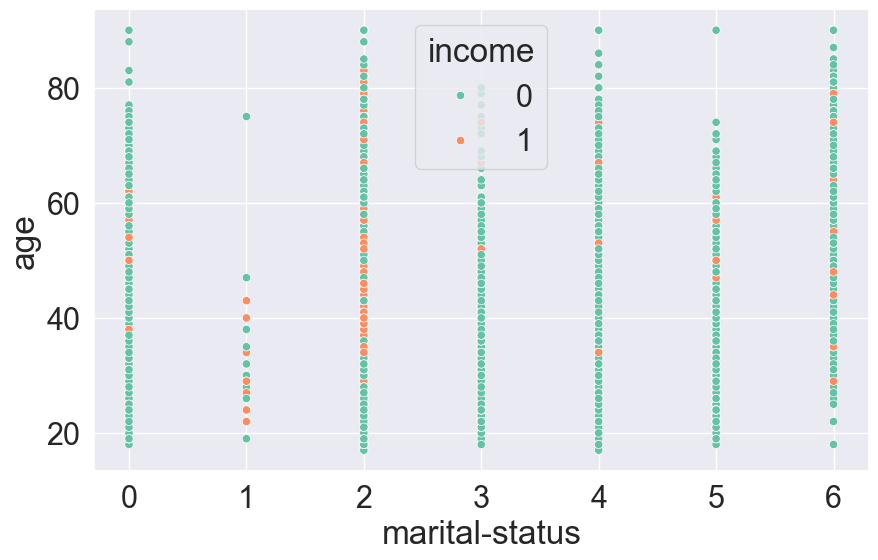

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='marital-status', y='age', hue='income', data=df, palette='Set2')
plt.show()

In [40]:
#df.income=df['income'].map({0:'Under $50K', 1:'Over $50K'})



In [41]:
df.income


0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

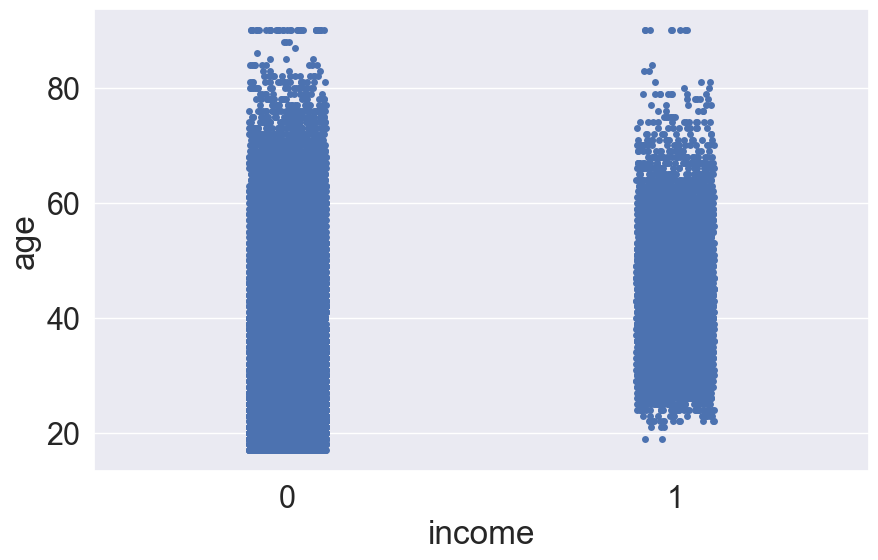

In [42]:
# Now notice with this stripplot that the x-axis has words instead of 0 and 1
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x='income', y='age', jitter=True);
plt.show();

In [43]:
# To map values back into numbers
plt.show();

In [44]:
df.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2           6             1     4    1             0             0   
3           6             0     2    1             0             0   
4          10             5     2    0             0             0   

   hours-per-week  native-country  income  
0              40              39       0  
1              13              39       0  
2              40              39       0  
3              40              39       0  
4              40               5       0

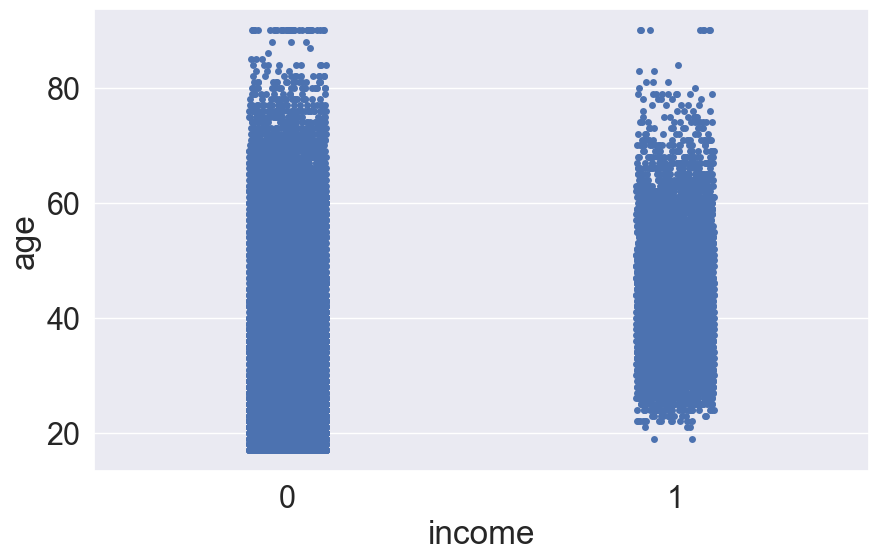

In [45]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x='income', y='age', jitter=True);
plt.show()

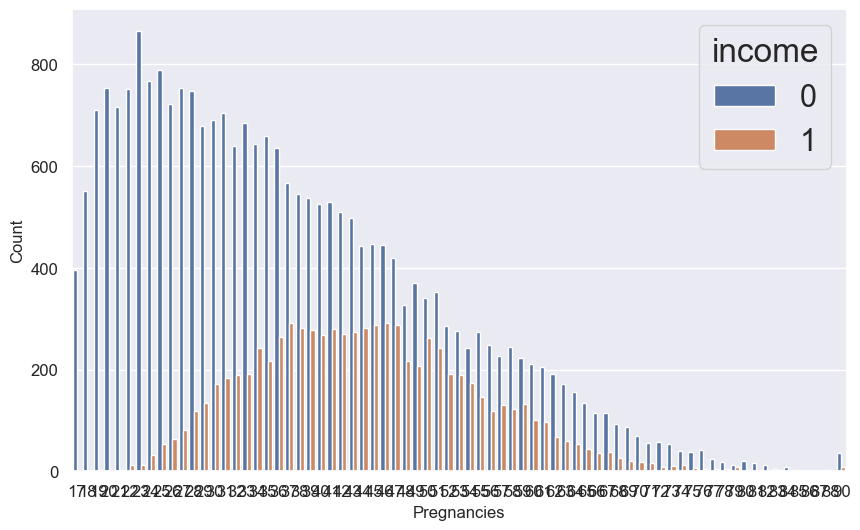

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='age', hue='income')

plt.xticks(fontsize=12)  # Smaller x-axis tick labels
plt.yticks(fontsize=12)  # Smaller y-axis tick labels

plt.xlabel('Pregnancies', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [47]:
data=df


In [48]:
# Libraries for different ML classifiers

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Libraries for model tuning and evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [49]:
# Separate Outcome or Target variable from the predictors

X = data.drop('income',axis=1)    # Replace 'Outcome' with your target variable name
y = data['income'] # Replace 'Outcome' with your target variable name

# We used .astype ('int64) above to convert target to integers since some functions might not work with bool type

In [50]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(22792, 14) (9769, 14)


In [51]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

# 2 commonly used splitting criteria are Gini impurity and information gain (entropy)
# Gini: measures the probability of misclassifying a randomly chosen element if it were randomly labeled
    # Would goal be to minimize or maximize the Gini impurity when making splits???
        # MINIMIZE
    
    
# Information Gain (Entropy): entropy measures impurity or uncertainty, while information gain quantifies reduction in entropy
    # Which do we want to minimize? Maximize?
        # MINIMIZE Entropy
        # MAXIMIZE Information Gain

In [52]:
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [53]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

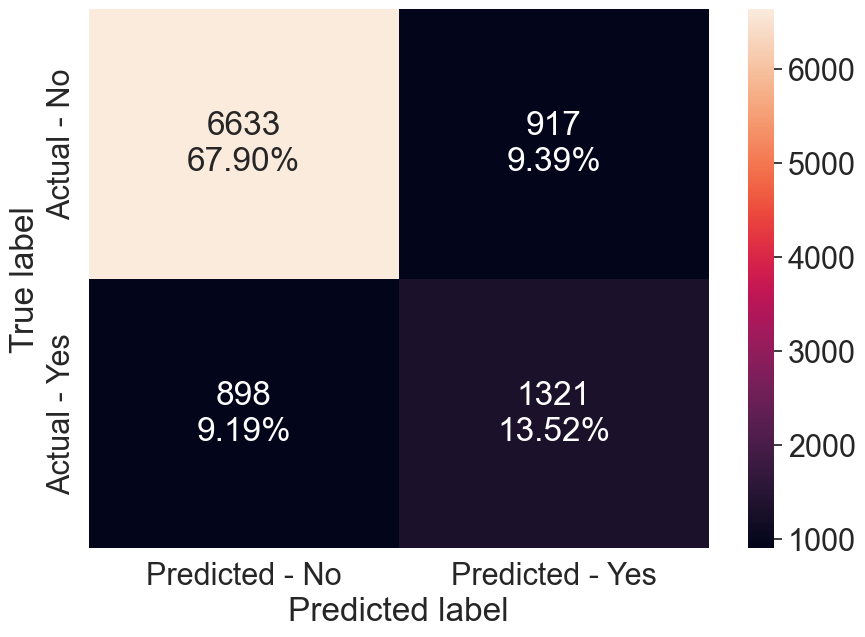

In [54]:
make_confusion_matrix(model,y_test)
plt.show()

In [55]:
y_train.value_counts(1)

income
0   0.753
1   0.247
Name: proportion, dtype: float64

In [56]:
column_names = list(data.columns)
column_names.remove('income')  # As this is the DV                
feature_names = column_names
print(feature_names)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


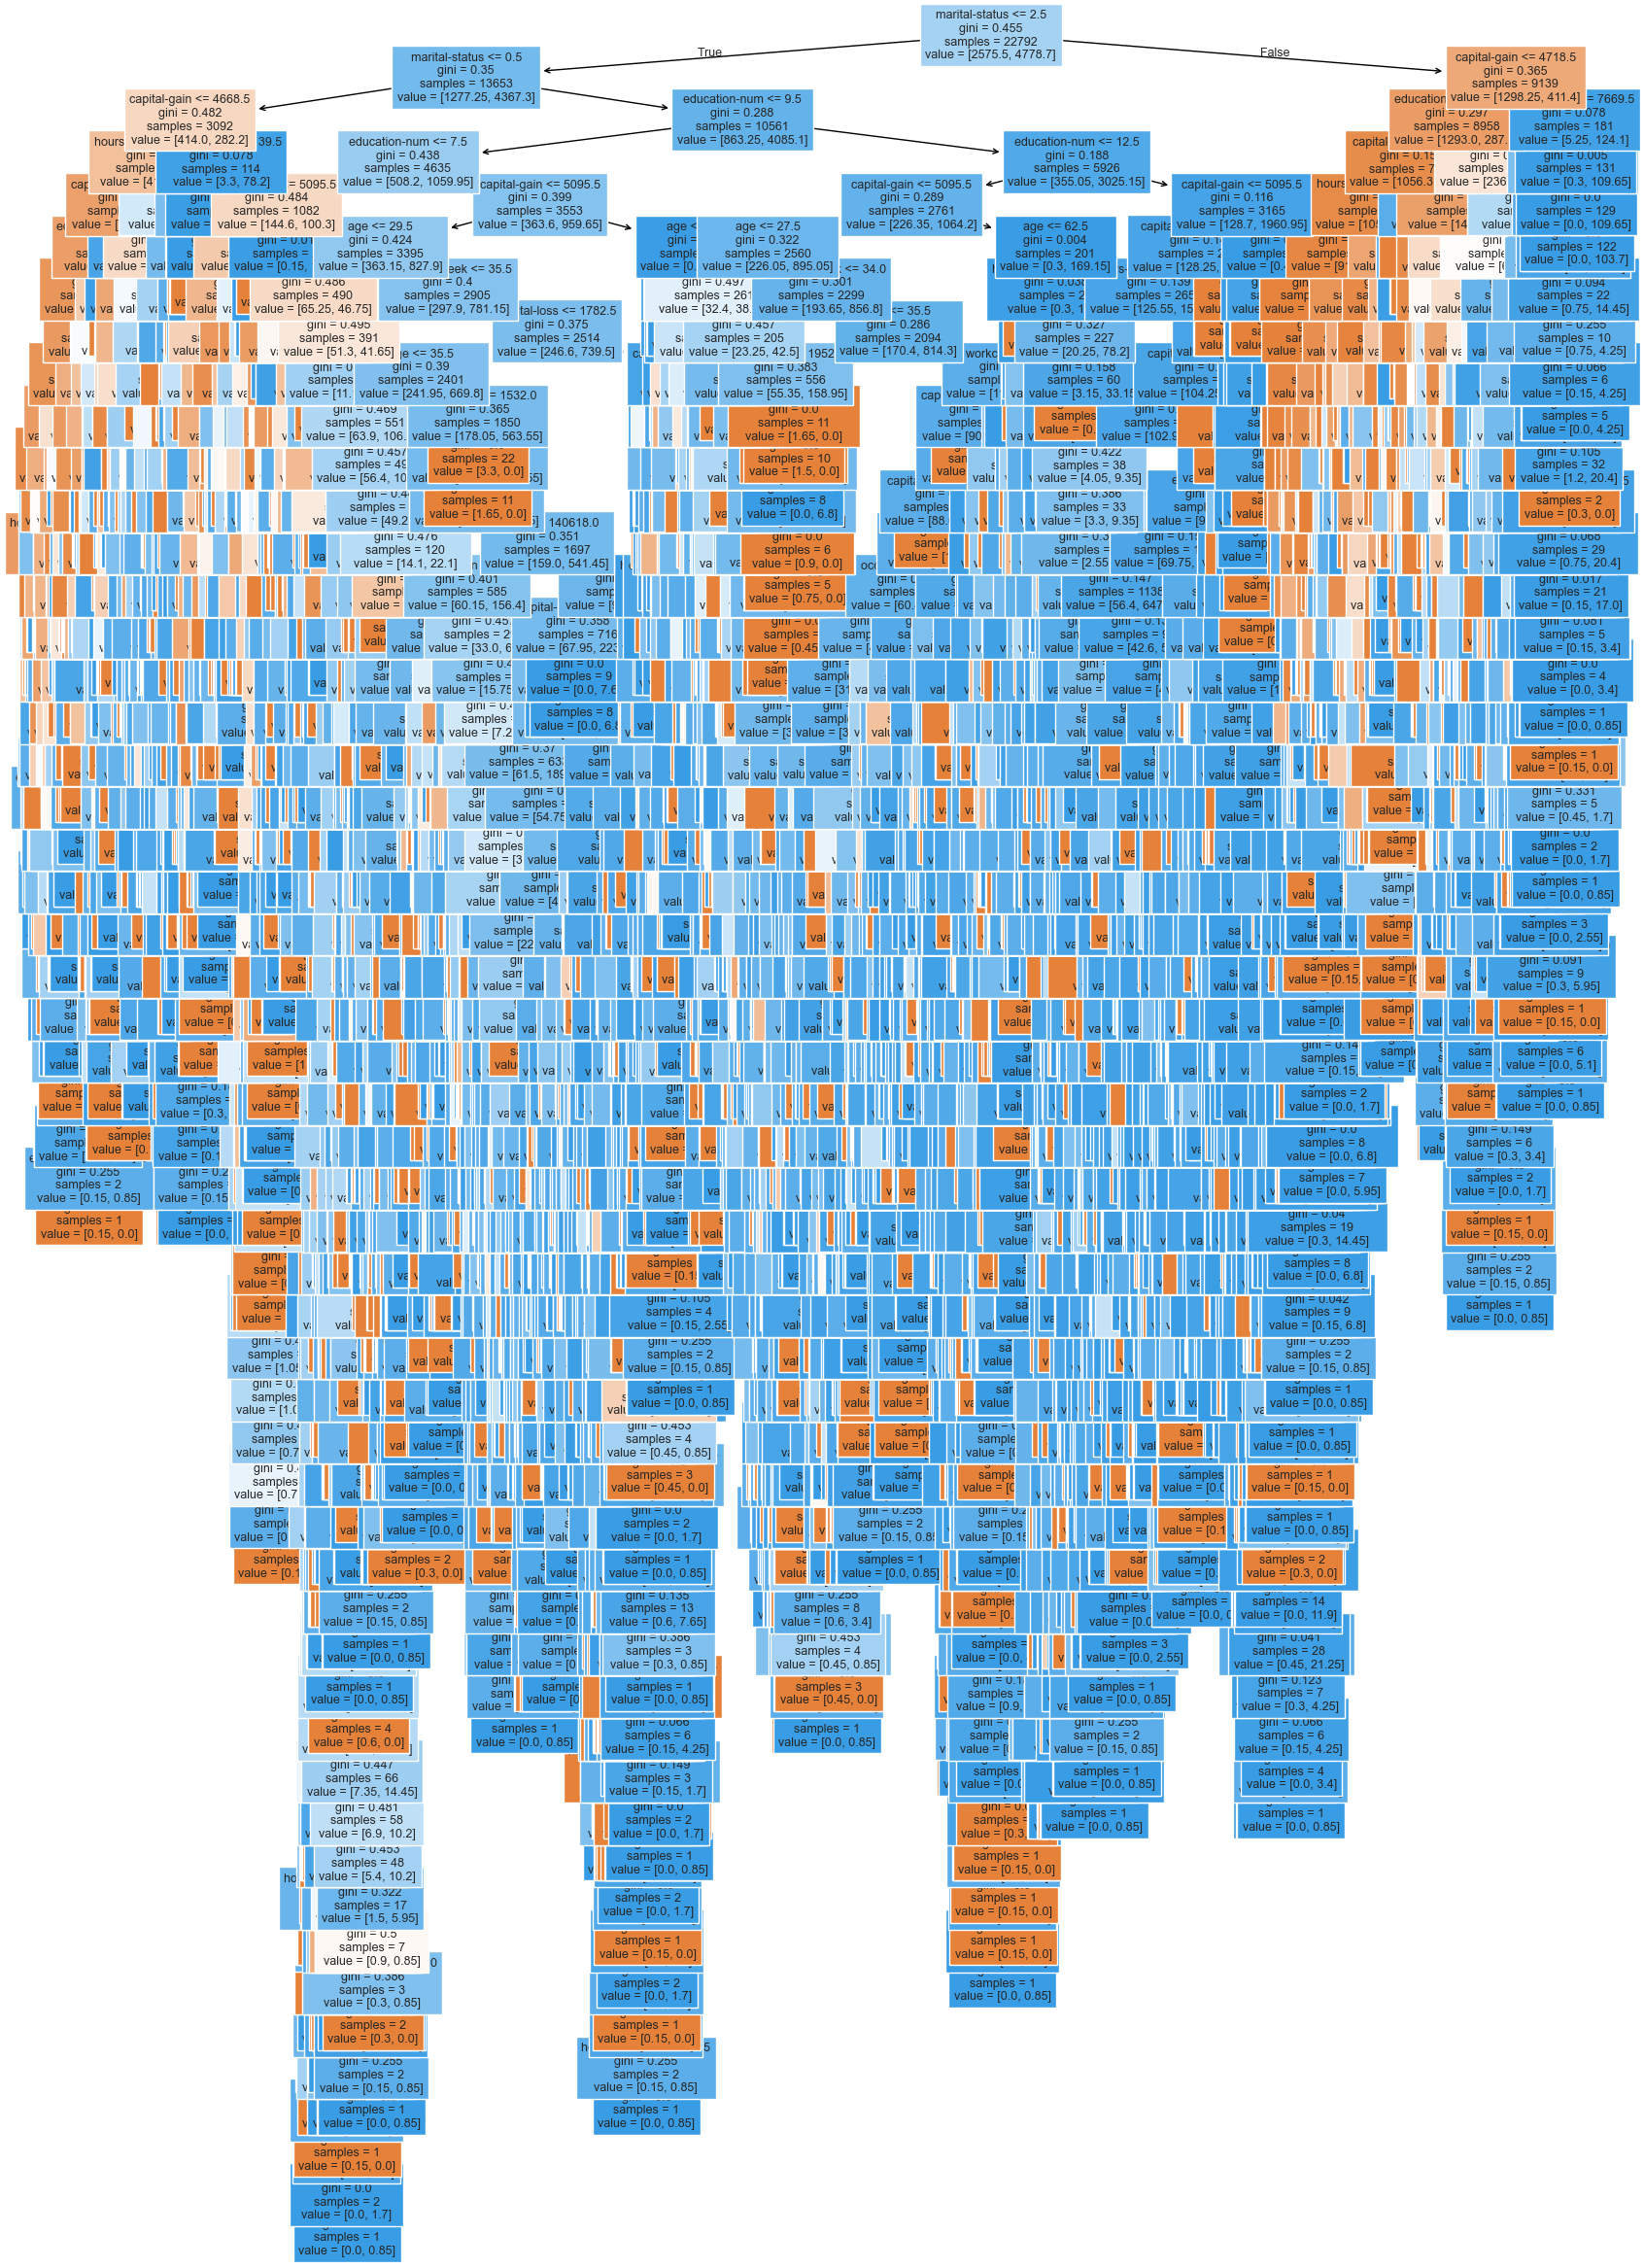

In [57]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
# Code below will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [58]:
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- marital-status <= 2.50
|   |--- marital-status <= 0.50
|   |   |--- capital-gain <= 4668.50
|   |   |   |--- hours-per-week <= 43.50
|   |   |   |   |--- capital-loss <= 2231.50
|   |   |   |   |   |--- education-num <= 12.50
|   |   |   |   |   |   |--- age <= 30.50
|   |   |   |   |   |   |   |--- weights: [35.85, 0.00] class: 0
|   |   |   |   |   |   |--- age >  30.50
|   |   |   |   |   |   |   |--- occupation <= 9.50
|   |   |   |   |   |   |   |   |--- occupation <= 6.50
|   |   |   |   |   |   |   |   |   |--- occupation <= 2.00
|   |   |   |   |   |   |   |   |   |   |--- fnlwgt <= 22038.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- fnlwgt >  22038.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |--- occupation >  2.00
|   |   |   |   |   |   |   |   |   |   |--- native-country <= 34.50
|   |   |   |   |   |   |   |   |   |   

In [59]:
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                 Imp
marital-status 0.291
fnlwgt         0.168
age            0.115
education-num  0.093
capital-gain   0.090
hours-per-week 0.074
occupation     0.056
workclass      0.026
capital-loss   0.025
race           0.015
education      0.013
native-country 0.013
relationship   0.013
sex            0.008


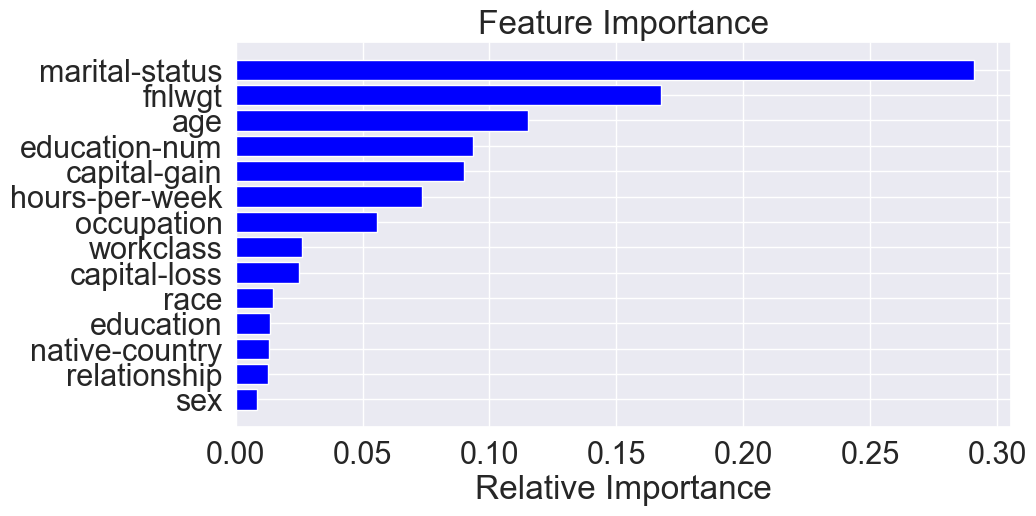

In [60]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [61]:
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85}) 
# Random state = controls random shuffling and splitting
# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(15,27),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.0001,0.001,0.001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=15,
                       max_features='log2', min_impurity_decrease=0.0001,
                       random_state=1)

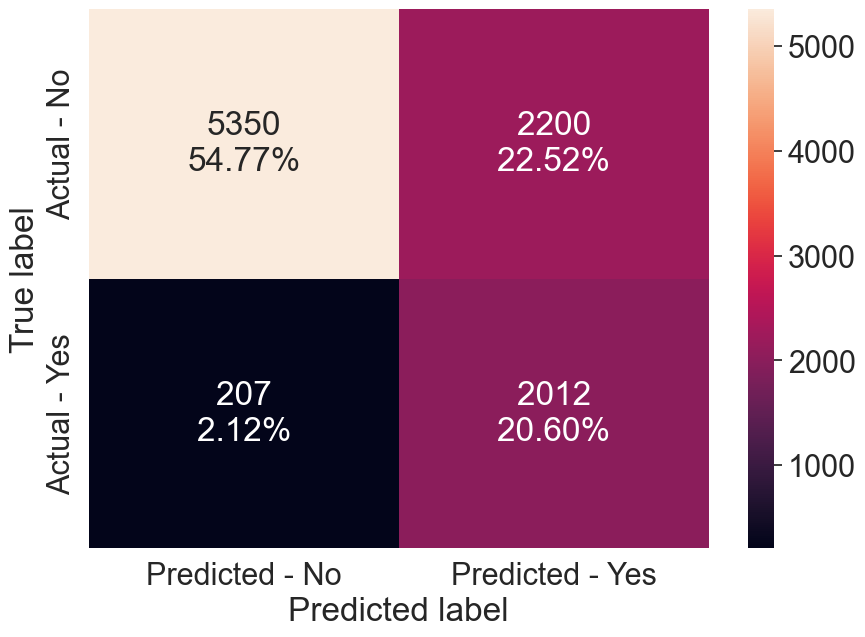

In [62]:
make_confusion_matrix(estimator,y_test)


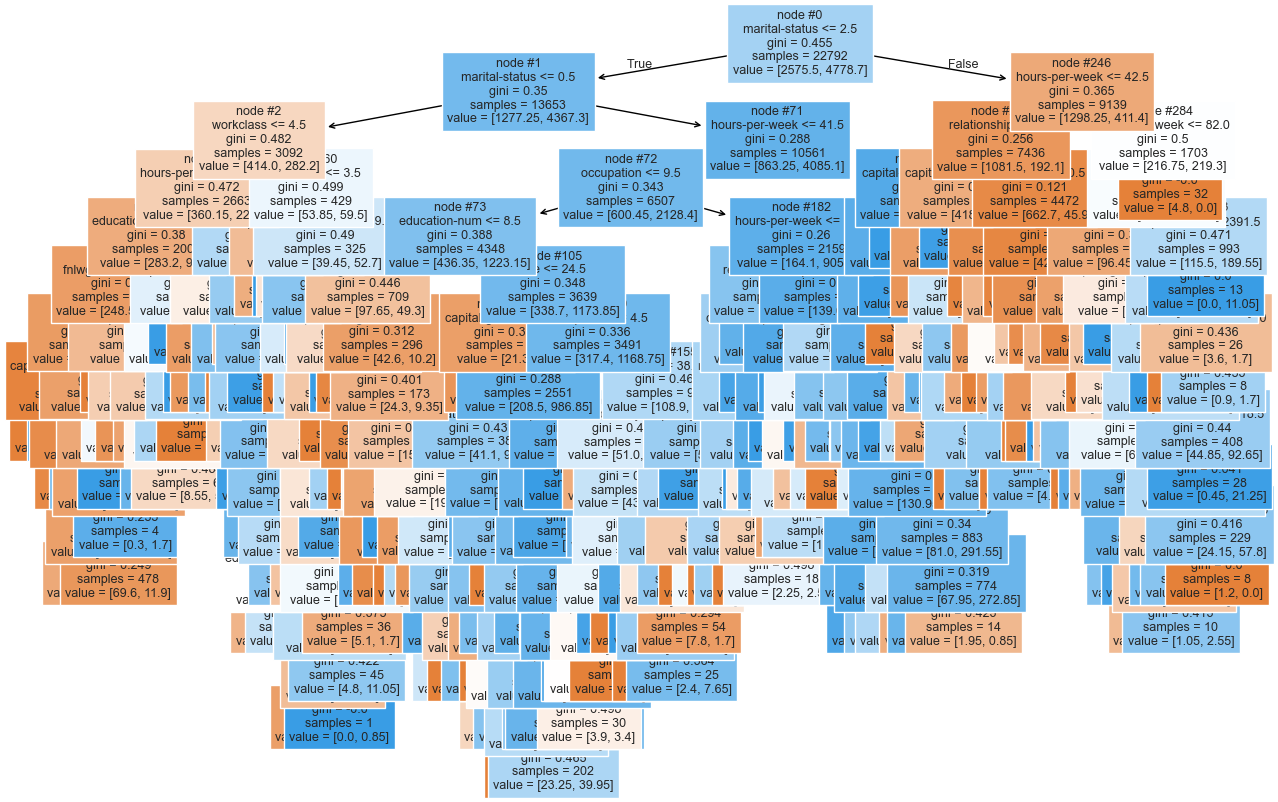

In [63]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [64]:
print(tree.export_text(estimator,feature_names=feature_names,show_weights=False))


|--- marital-status <= 2.50
|   |--- marital-status <= 0.50
|   |   |--- workclass <= 4.50
|   |   |   |--- hours-per-week <= 43.50
|   |   |   |   |--- education-num <= 12.50
|   |   |   |   |   |--- fnlwgt <= 356331.00
|   |   |   |   |   |   |--- age <= 31.50
|   |   |   |   |   |   |   |--- capital-gain <= 10596.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- capital-gain >  10596.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- age >  31.50
|   |   |   |   |   |   |   |--- hours-per-week <= 39.50
|   |   |   |   |   |   |   |   |--- capital-gain <= 4718.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- capital-gain >  4718.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- hours-per-week >  39.50
|   |   |   |   |   |   |   |   |--- capital-gain <= 7669.50
|   |   |   |   |   |   |   |   |   |--- capital-loss <= 2231.50
|   |   |   |   |   |   |

In [65]:
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                 Imp
marital-status 0.552
education-num  0.101
hours-per-week 0.099
capital-gain   0.081
age            0.058
occupation     0.042
relationship   0.018
capital-loss   0.015
fnlwgt         0.013
workclass      0.007
sex            0.005
native-country 0.004
education      0.003
race           0.002


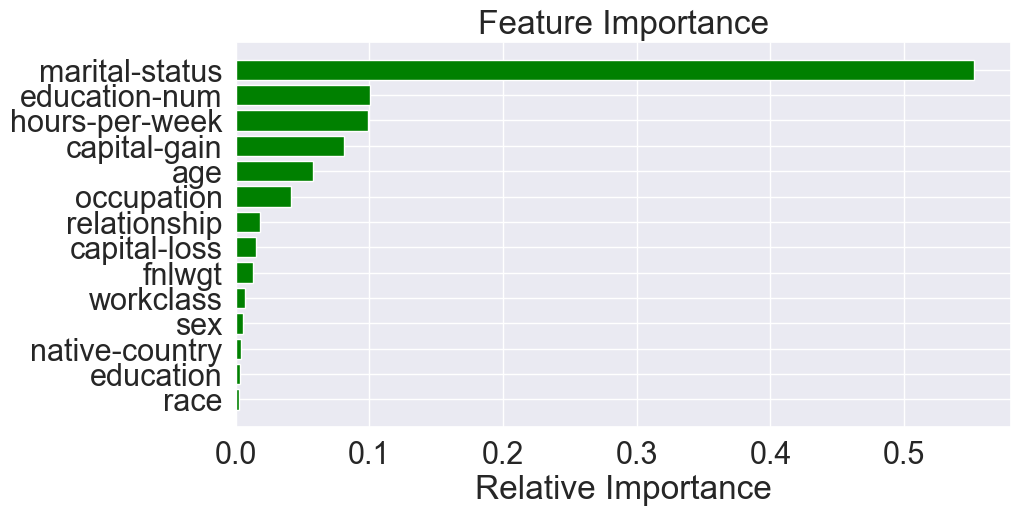

In [66]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Decision Tree


Now let's run and compare a Decision Tree (again, to demonstrate how we compare it with other models), a Bagging Classifier, and a Random Forest, along with the tuned versions of each.
6 models total:
Decision Tree
Tuned Decision Tree
Bagging Classifier
Tuned Bagging Classifier
Random Forest
Tuned Forest
Decision Tree
A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks. It works by recursively splitting the dataset into subsets based on feature values, aiming to create branches that lead to the most homogeneous (pure) groups regarding the target variable. Each internal node represents a decision rule on a feature, and each leaf node represents a class label (for classification) or a continuous value (for regression).

Decision Trees are easy to interpret, visualize, and understand. However, they can easily overfit the training data if not properly pruned or regularized.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [67]:
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.3,1:0.70},random_state=1)

dtree_estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.3, 1: 0.7})
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

In [68]:
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    # Recall = minimizes false negatives
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    # Precision = minimizes false positives

    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    # F1 Score = balances precision and recall
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returns the list with train and test scores

In [69]:
# Function to make confusion matrix

def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    # Predict using the model
    y_predict = model.predict(X_test)  # <- This should match y_actual's source
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    
    # Create a labeled DataFrame for the confusion matrix
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                              columns = [i for i in ['Predicted - No','Predicted - Yes']])
    
    # Format counts and percentages for annotation
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    
    # Combine into annotation labels
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    # Plot the heatmap
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels, fmt='', cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Accuracy on training set :  0.999956124956125
Accuracy on test set :  0.813798751151602
Recall on training set :  1.0
Recall on test set :  0.6196484903109509
Precision on training set :  0.999822158989863
Precision on test set :  0.5851063829787234
F1 Score on training set :  0.9999110715873721
F1 Score on test set :  0.6018822499452834


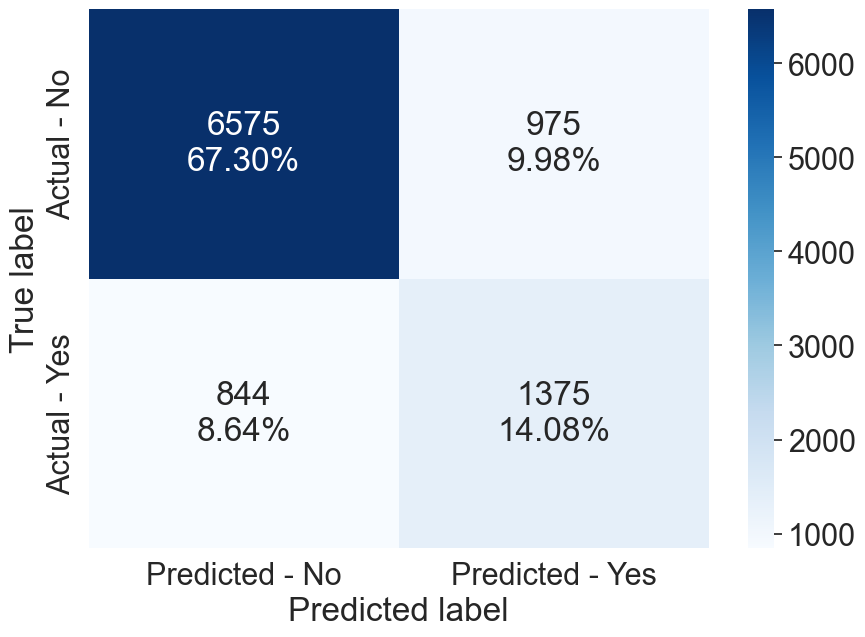

In [70]:
# Calculate metrics for your model
get_metrics_score(dtree_estimator)

# Create confusion matrix for your mdodel
make_confusion_matrix(dtree_estimator, y_test)

In [71]:
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.35, 1:0.65}, random_state=1)

parameters = {
    'max_depth': np.arange(2, 10),
    'min_samples_leaf': [5, 7, 10, 15],
    'max_leaf_nodes': [2, 3, 5, 10, 15],
    'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1]
}

# Parameters above control the size and shape of the tree, preventing it from growing too large or fitting noise.

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, n_jobs=-1)
grid_obj.fit(X_train, y_train)

dtree_tuned = grid_obj.best_estimator_

dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=2,
                       max_leaf_nodes=3, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

Accuracy on training set :  0.7166110916110916
Accuracy on test set :  0.7116388576108097
Recall on training set :  0.8498754891497687
Recall on test set :  0.8494817485353763
Precision on training set :  0.4597325122678726
Precision on test set :  0.43154761904761907
F1 Score on training set :  0.5966906025600999
F1 Score on test set :  0.5723394565052375


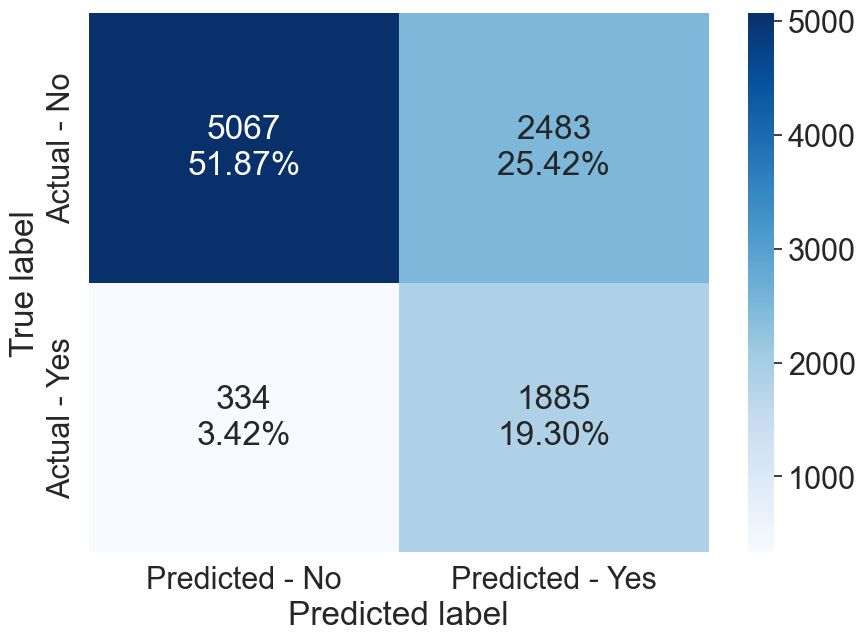

In [72]:
get_metrics_score(dtree_tuned)
make_confusion_matrix(dtree_tuned,y_test)

# Bagging Classifier:
The BaggingClassifier (Bootstrap Aggregating) is an ensemble meta-estimator that fits base classifiers on random subsets of the original dataset (with replacement) and aggregates their predictions to improve overall model stability and accuracy. By combining multiple models trained on different bootstrap samples, bagging helps reduce variance and overfitting compared to a single estimator.

It is particularly effective with high-variance, low-bias models like decision trees.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

Accuracy on training set :  0.9858722358722358
Accuracy on test set :  0.8495240045040434
Recall on training set :  0.9480611881892564
Recall on test set :  0.5844975214060387
Precision on training set :  0.9944029850746269
Precision on test set :  0.7029810298102981
F1 Score on training set :  0.9706792933891824
F1 Score on test set :  0.6382874015748031


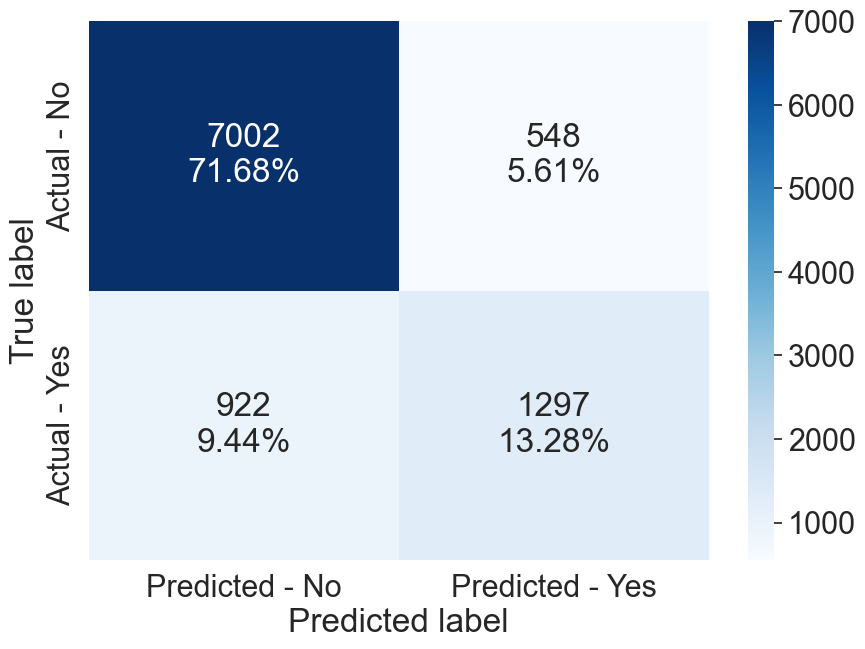

In [73]:
# Fit the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(bagging_classifier)

# Create the confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

In [74]:
# Define base BaggingClassifier
bagging_tuned = BaggingClassifier(random_state=1)

# Hyperparameter grid
parameters = {
    'max_samples': [0.7, 0.8, 0.9, 1],
    'max_features': [0.7, 0.8, 0.9, 1],
    'n_estimators': [10, 20, 30, 40, 50],
}

# Use recall as scoring metric
recall_scorer = metrics.make_scorer(metrics.recall_score)

# Setup GridSearchCV with parallel jobs and 5-fold CV
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=recall_scorer, cv=5, n_jobs=-1)

# Fit grid search
grid_obj.fit(X_train, y_train)

# Best estimator from grid search
bagging_tuned = grid_obj.best_estimator_

# Fit the best model on full training data
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=50,
                  random_state=1)

Accuracy on training set :  0.9968848718848718
Accuracy on test set :  0.8649810625447846
Recall on training set :  0.9902170046246888
Recall on test set :  0.6390265885534024
Precision on training set :  0.9971341572631202
Precision on test set :  0.7324380165289256
F1 Score on training set :  0.9936635430611335
F1 Score on test set :  0.6825511432009627


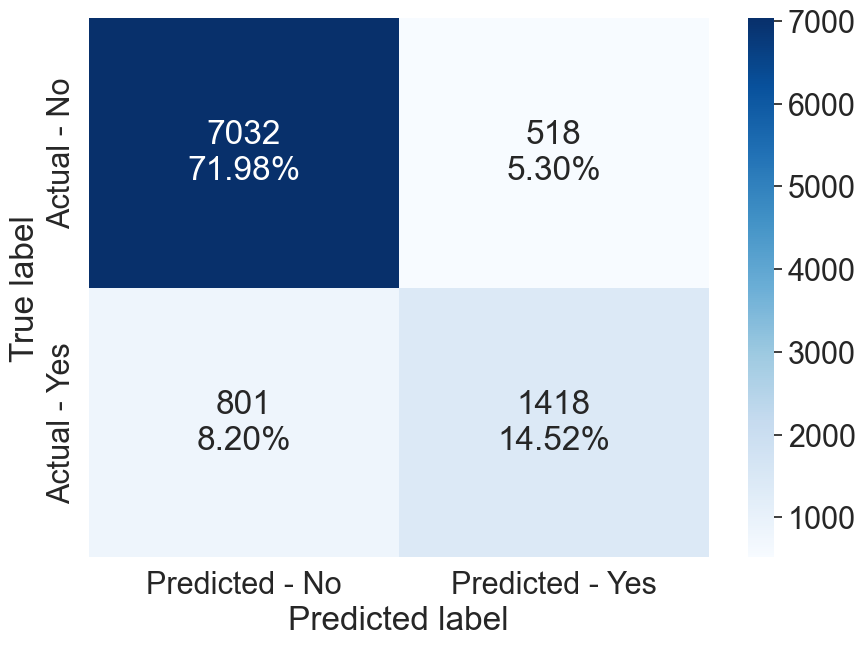

In [75]:
get_metrics_score(bagging_tuned)

make_confusion_matrix(bagging_tuned,y_test)

# Random Forest
Random Forest is an ensemble learning method that constructs a multitude of decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It introduces randomness by selecting random subsets of features and data samples to build each tree, which helps reduce overfitting and improves generalization.

Because it aggregates many decision trees, Random Forest tends to be robust, accurate, and resistant to noise and outliers, making it one of the most popular machine learning algorithms for classification and regression tasks.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Accuracy on training set :  0.9999122499122499
Accuracy on test set :  0.8621148531067663
Recall on training set :  0.9996442547136251
Recall on test set :  0.637223974763407
Precision on training set :  1.0
Precision on test set :  0.7229038854805726
F1 Score on training set :  0.9998220957125067
F1 Score on test set :  0.6773652694610779


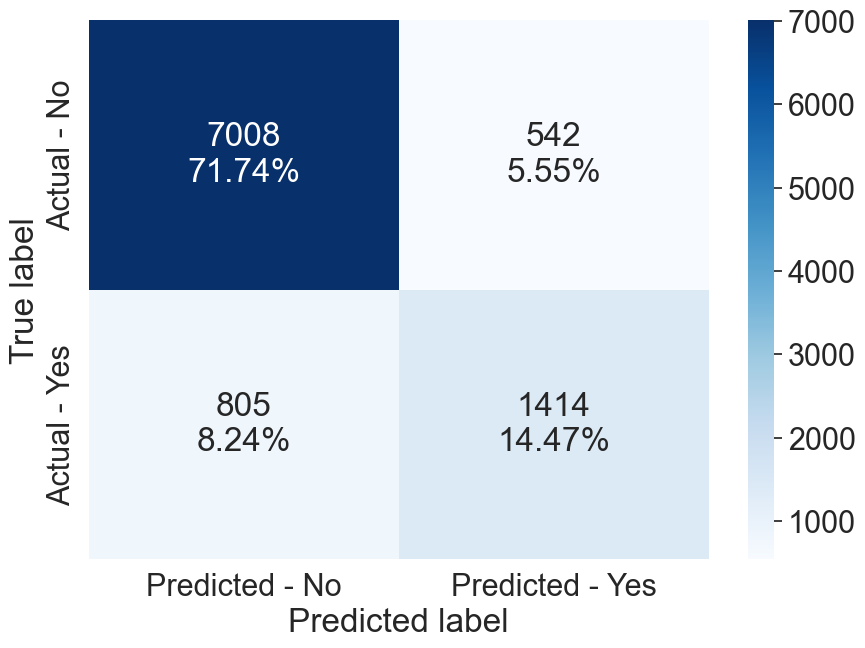

In [76]:
# Fit the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(rf_estimator)

# Create the confusion matrix
make_confusion_matrix(rf_estimator,y_test)

In [77]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

rf_tuned = RandomForestClassifier(class_weight={0:0.35,1:0.65}, random_state=1)

parameters = {  
    'max_depth': list(np.arange(3, 10, 1)),
    'max_features': np.arange(0.6, 1.1, 0.1),
    'min_samples_split': np.arange(2, 20, 5),
    'n_estimators': np.arange(30, 160, 20),
    'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1]
}

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj.fit(X_train, y_train)

rf_tuned = grid_obj.best_estimator_
rf_tuned.fit(X_train, y_train)

CPU times: total: 1min 50s
Wall time: 48min 19s


RandomForestClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=7,
                       max_features=0.8999999999999999,
                       min_impurity_decrease=0.0001, min_samples_split=17,
                       n_estimators=90, random_state=1)

Accuracy on training set :  0.8350298350298351
Accuracy on test set :  0.8281297983416931
Recall on training set :  0.8103877623621487
Recall on test set :  0.7976566020730058
Precision on training set :  0.6284137931034482
Precision on test set :  0.59
F1 Score on training set :  0.7078931013051585
F1 Score on test set :  0.6782908603180686


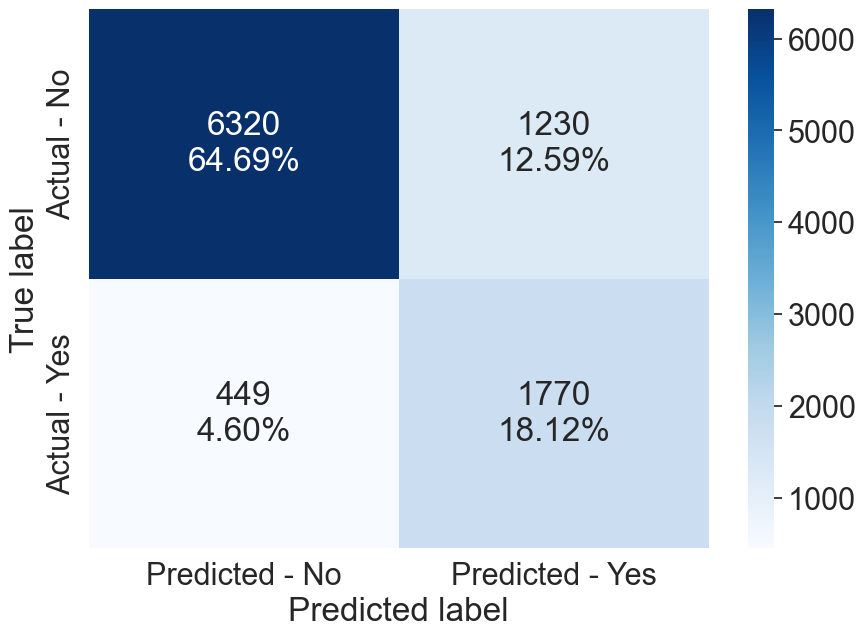

In [78]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

# Comparing Supervised ML Classification Models


In [79]:
# Identify the models to compare
models = [dtree_estimator, dtree_tuned, bagging_classifier, bagging_tuned, rf_estimator, rf_tuned]

# Define empty lists to store results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# Loop through all models to collect metrics (Accuracy, Recall, Precision, F1)
for model in models:
    scores = get_metrics_score(model, False)
    acc_train.append(scores[0])
    acc_test.append(scores[1])
    recall_train.append(scores[2])
    recall_test.append(scores[3])
    precision_train.append(scores[4])
    precision_test.append(scores[5])
    f1_train.append(scores[6])
    f1_test.append(scores[7])

In [80]:
# Compare models on evaluation metrics

comparison_frame = pd.DataFrame({
    'Model': ['Decision Tree', 'Tuned Decision Tree', 'Bagging Classifier', 'Tuned Bagging Classifier', 'Random Forest', 'Tuned Random Forest'],
    'Train_Accuracy': acc_train,
    'Test_Accuracy': acc_test,
    'Train_Recall': recall_train,
    'Test_Recall': recall_test,
    'Train_Precision': precision_train,
    'Test_Precision': precision_test,
    'Train_F1': f1_train,
    'Test_F1': f1_test
})

# Sort models in decreasing order of most important metric
comparison_frame_sorted = comparison_frame.sort_values(by='Test_Recall', ascending=False)

# Set display options to avoid wrapping wide DataFrames
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)

# Print sorted DataFrame
print(comparison_frame_sorted)

                      Model  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1  Test_F1
1       Tuned Decision Tree           0.717          0.712         0.850        0.849            0.460           0.432     0.597    0.572
5       Tuned Random Forest           0.835          0.828         0.810        0.798            0.628           0.590     0.708    0.678
3  Tuned Bagging Classifier           0.997          0.865         0.990        0.639            0.997           0.732     0.994    0.683
4             Random Forest           1.000          0.862         1.000        0.637            1.000           0.723     1.000    0.677
0             Decision Tree           1.000          0.814         1.000        0.620            1.000           0.585     1.000    0.602
2        Bagging Classifier           0.986          0.850         0.948        0.584            0.994           0.703     0.971    0.638


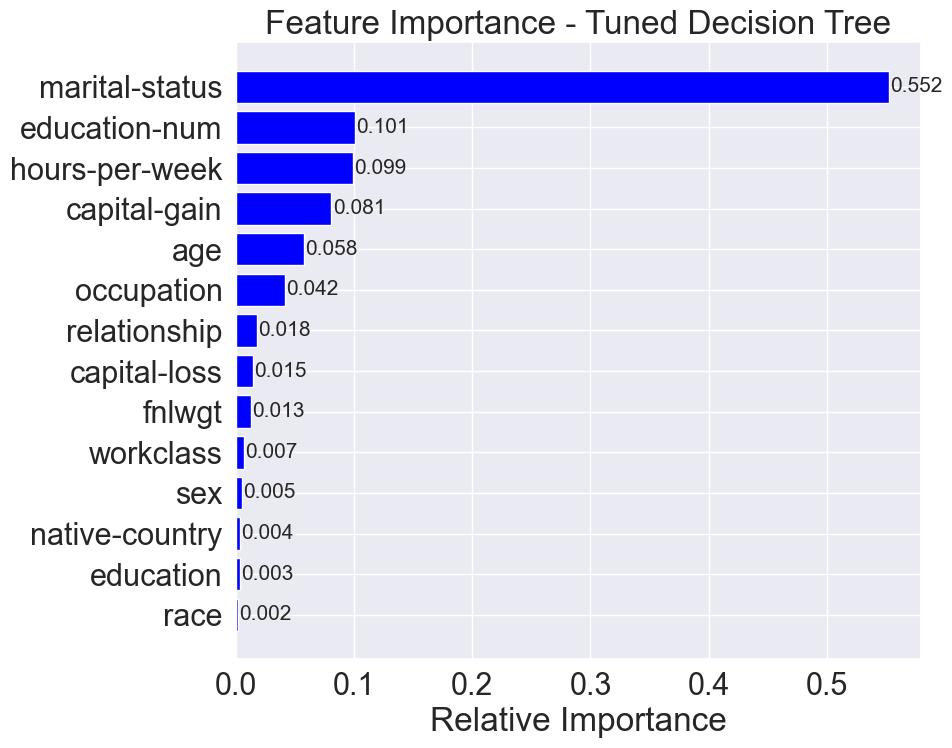

In [81]:
# Get feature names and their importance scores for the best model

model_name = 'Tuned Decision Tree'  # dynamically assign this as needed

plt.figure(figsize=(10, 8))
plt.title(f'Feature Importance - {model_name}')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

for i, idx in enumerate(indices):
    val = importances[idx]
    if val < 0.001:
        label = "<0.001"
    else:
        label = f"{val:.3f}"
    plt.text(val + 0.001, i, label, va='center', fontsize=15)

plt.tight_layout()
plt.show()

# Logistic Regression
Logistic regression is a statistical method used for binary classification problems. It estimates the probability that a given input point belongs to a particular class by applying a logistic (sigmoid) function to a linear combination of the input features. Unlike linear regression, which predicts continuous values, logistic regression outputs probabilities and assigns class labels based on a threshold (commonly 0.5).
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [82]:
# Import additional library
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [83]:
# Standardize the features before running logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(
    solver='newton-cg',
    max_iter=1000,
    penalty=None,           # Regularization
    verbose=True,           # Shows optimization progress
    n_jobs=-1,              # Use all CPU cores
    random_state=0
)

In [84]:
def get_metrics_score(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

In [85]:
# Fit the model to the training data
log_reg.fit(X_train_scaled, y_train)

# Predict probabilities for ROC curve
y_probs = log_reg.predict_proba(X_test_scaled)[:, 1]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


In [86]:
def get_metrics_score(model, X_train, y_train, X_test, y_test):
    # Predict on train and test
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Print results
    print("Model Performance")
    print("-" * 40)
    print("{:<15} {:<10} {:<10}".format("Metric", "Train", "Test"))
    print("-" * 40)
    print("{:<15} {:<10.2f} {:<10.2f}".format("Accuracy", 
          accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)))
    print("{:<15} {:<10.2f} {:<10.2f}".format("Precision", 
          precision_score(y_train, y_pred_train), precision_score(y_test, y_pred_test)))
    print("{:<15} {:<10.2f} {:<10.2f}".format("Recall", 
          recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test)))
    print("{:<15} {:<10.2f} {:<10.2f}".format("F1 Score", 
          f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)))
    print("-" * 40)

In [87]:
def make_confusion_matrix(model, X_test, y_actual, labels=[0, 1]):
    # Predict using the model
    y_predict = model.predict(X_test)
    
    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=labels)
    
    # Create labeled DataFrame
    df_cm = pd.DataFrame(
        cm,
        index=["Actual - No", "Actual - Yes"],
        columns=["Predicted - No", "Predicted - Yes"]
    )
    
    # Prepare annotation labels (counts + percentages)
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    annot_labels = [f"{count}\n{percent}" for count, percent in zip(group_counts, group_percentages)]
    annot_labels = np.asarray(annot_labels).reshape(cm.shape)
    
    # Plot the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=annot_labels, fmt="", cmap="Blues")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("")
    plt.tight_layout()
    plt.show()

Model Performance
----------------------------------------
Metric          Train      Test      
----------------------------------------
Accuracy        0.82       0.83      
Precision       0.72       0.70      
Recall          0.46       0.45      
F1 Score        0.56       0.55      
----------------------------------------


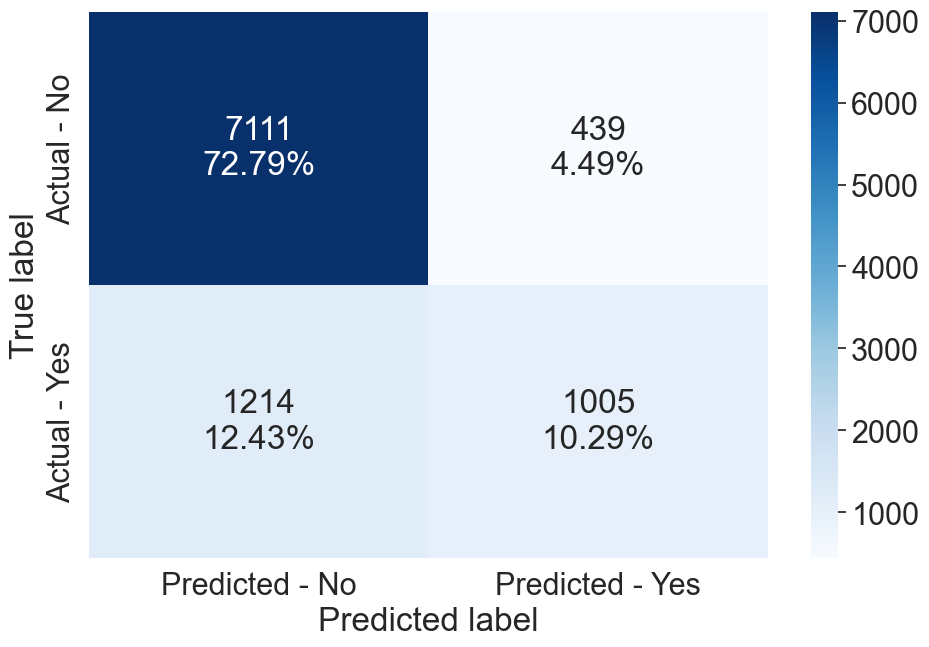

In [88]:
get_metrics_score(log_reg, X_train_scaled, y_train, X_test_scaled, y_test)
make_confusion_matrix(log_reg, X_test_scaled, y_test)

# Create ROC Curve
The ROC Curve, or Receiver Operating Characteristic Curve, is a visual tool used to evaluate how well a binary classification model (like logistic regression) performs. It shows the trade-off between two things:

True Positive Rate (TPR): also called sensitivity or recall: the proportion of actual positives that the model correctly predicts as positive.

False Positive Rate (FPR): the proportion of actual negatives that the model incorrectly predicts as positive.

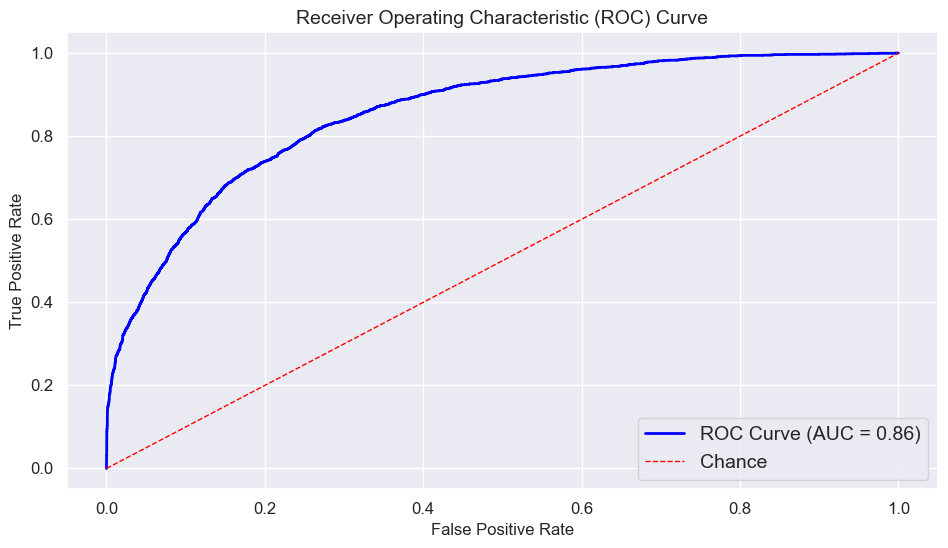

In [89]:
# Import additional library
from sklearn.metrics import roc_curve, auc

# Ensure X_test is scaled like training data
y_probs = log_reg.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Chance')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.legend(loc='lower right', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Interpreting the Curve
A perfect model goes straight up the y-axis to 1.0 (TPR = 100%) and then straight across the top (FPR = 0%) -- this means it never makes a mistake.

A random model would follow the diagonal line from (0, 0) to (1, 1) -- this is the “guessing” line.

The farther above the diagonal the ROC curve goes, the better the model is at distinguishing between the two classes.

Area Under the Curve (AUC)
Gives a single number that summarizes the performance of the model.

AUC ranges from 0 to 1:

1.0 = perfect model

0.5 = random guessing

Below 0.5 = worse than guessing

So if your model has an AUC of __%, that means it can correctly distinguish positive from negative cases about __% of the time.

Logistic Regression Linear Equation
The linear equation in logistic regression is:

$$ z = \mathbf{w}^T \mathbf{x} + b $$
Where:

$\mathbf{z}$ is the linear combination input to the sigmoid function
$\mathbf{w}$ is the weight vector (model coefficients)
$\mathbf{x}$ is the input feature vector
$b$ is the bias (intercept term)
$\mathbf{w}^T$ is the transpose of the weight vector

What does the transpose mean?
Transposing a vector means flipping it from a column to a row, or vice versa.

If:

$$ \mathbf{w} = \begin{bmatrix} w_1 \\ w_2 \\ w_3 \end{bmatrix} \quad \text{then} \quad \mathbf{w}^T = \begin{bmatrix} w_1 & w_2 & w_3 \end{bmatrix} $$
So the product:

$$ \mathbf{w}^T \mathbf{x} = w_1 x_1 + w_2 x_2 + w_3 x_3 $$
is a scalar (single number), which is passed into the sigmoid function to get the probability of the positive class:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
Sigmoid Curve
The sigmoid function converts any real-valued number (from the linear equation $z = \mathbf{w}^T \mathbf{x} + b$) into a probability between 0 and 1. This is what logistic regression uses to estimate the probability of the positive class (e.g., class 1).

The curve is S-shaped:

Near 0 for strongly negative linear inputs,

Near 1 for strongly positive ones,

Around 0.5 when the model is unsure.

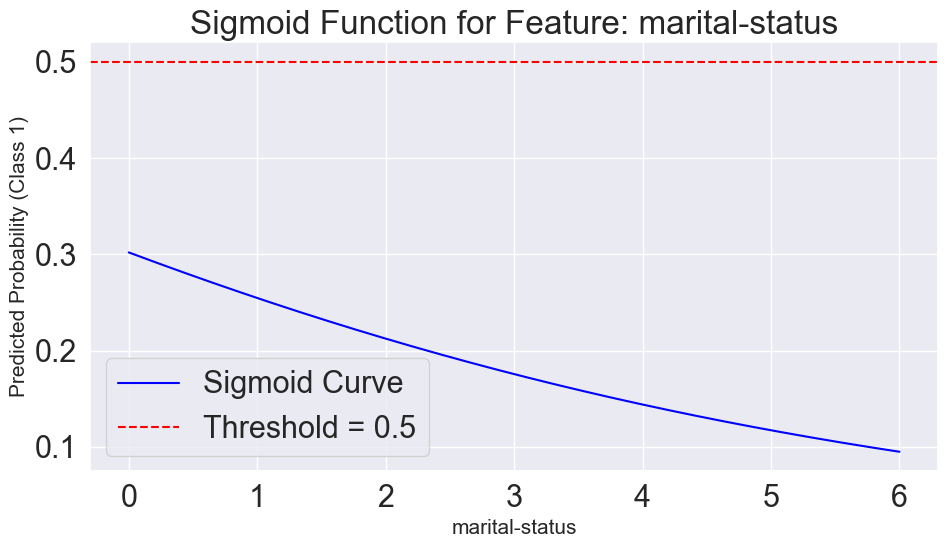


Interpretation:
- This sigmoid curve shows how the feature 'marital-status' influences the model's prediction for class 1.
- The decision threshold (where predicted probability = 0.5) occurs at approximately **-3.54**.
- Feature values **below -3.54** are associated with a low predicted probability of class 1.
- Feature values **above -3.54** are associated with a high predicted probability of class 1.
- The curve is relatively flat, so 'marital-status' may have **limited predictive power** on its own.


In [90]:
from scipy.special import expit  # Numerically stable sigmoid

# Choose the feature you want to visualize
feature_name = "marital-status"  # <-- CHANGE this to your real feature name
if feature_name not in X_train.columns:
    raise ValueError(f"'{feature_name}' is not a valid feature in X_train.")

# Get the index of the feature
feature_index = list(X_train.columns).index(feature_name)

# Get the corresponding coefficient and intercept from the trained model
coef = log_reg.coef_[0][feature_index]
intercept = log_reg.intercept_[0]

# Generate a range of values across that feature's actual (unscaled) range
x_vals = np.linspace(X_train[feature_name].min(), X_train[feature_name].max(), 300)

# Re-standardize manually to match the model's input scale
mean = X_train[feature_name].mean()
std = X_train[feature_name].std()
x_vals_scaled = (x_vals - mean) / std

# Compute z = w*x + b and apply sigmoid
z = intercept + coef * x_vals_scaled
sigmoid_vals = expit(z)

# Plot the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(x_vals, sigmoid_vals, label='Sigmoid Curve', color='blue')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.xlabel(f'{feature_name}', fontsize=15)
plt.ylabel('Predicted Probability (Class 1)', fontsize=15)
plt.title(f'Sigmoid Function for Feature: {feature_name}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute the feature value at which probability = 0.5 (decision boundary)
decision_boundary_scaled = -intercept / coef
decision_boundary = decision_boundary_scaled * std + mean  # convert back to original scale

# Compute curve steepness (magnitude of slope)
steepness = abs(coef)

# Generate interpretation message
print("\nInterpretation:")
print(f"- This sigmoid curve shows how the feature '{feature_name}' influences the model's prediction for class 1.")
print(f"- The decision threshold (where predicted probability = 0.5) occurs at approximately **{decision_boundary:.2f}**.")
print(f"- Feature values **below {decision_boundary:.2f}** are associated with a low predicted probability of class 1.")
print(f"- Feature values **above {decision_boundary:.2f}** are associated with a high predicted probability of class 1.")

# Interpret steepness
if steepness > 5:
    print(f"- The curve is steep, meaning '{feature_name}' is a **strong predictor** in the model.")
elif steepness > 1:
    print(f"- The curve is moderately steep, so '{feature_name}' is a **meaningful but not dominant predictor**.")
else:
    print(f"- The curve is relatively flat, so '{feature_name}' may have **limited predictive power** on its own.")

# Support Vector Machines (SVM)
Support Vector Machines (SVM) are supervised learning models used for classification and regression tasks. In classification, an SVM aims to find the optimal hyperplane that best separates data points from different classes. The algorithm focuses on maximizing the margin — the distance between the hyperplane and the closest data points (called support vectors).

SVMs can handle both linear and non-linear data:

For linear separation, a straight-line (or hyperplane in higher dimensions) is used.
For non-linear patterns, SVMs apply the kernel trick (e.g., RBF, polynomial) to transform data into a higher-dimensional space where a linear separator can be found.
They are particularly effective in high-dimensional spaces and are robust to overfitting, especially in sparse or low-sample-size datasets.
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Tried running SVM model but it took too long (around 20+ hours) so decided to terminate it so that I can prioratize other models

# Boosting Algorithms
Boosting is an ensemble technique that combines multiple weak learners (often decision trees) in sequence, where each new model attempts to correct the errors made by the previous ones. The final prediction is a weighted vote or sum of these models.

In [91]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n Performance: {name}")
    print("-" * 50)

    # Predict on train and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Compute metrics
    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_pred_train),
        'Precision': precision_score(y_train, y_pred_train),
        'Recall': recall_score(y_train, y_pred_train),
        'F1 Score': f1_score(y_train, y_pred_train)
    }

    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1 Score': f1_score(y_test, y_pred_test)
    }

    # Print table-style output
    print("{:<12} {:<10} {:<10}".format("Metric", "Train", "Test"))
    print("-" * 32)
    for metric in train_metrics:
        print("{:<12} {:<10.2f} {:<10.2f}".format(
            metric, train_metrics[metric], test_metrics[metric]
        ))

    # Confusion Matrix (Test Set Only)
    cm = confusion_matrix(y_test, y_pred_test)
    total = cm.sum()
    labels = [f"{v}\n{v/total:.2%}" for v in cm.flatten()]
    labels = np.array(labels).reshape(cm.shape)

    df_cm = pd.DataFrame(cm,
                         index=["Actual - No", "Actual - Yes"],
                         columns=["Predicted - No", "Predicted - Yes"])

    plt.figure(figsize=(10, 6))
    sns.heatmap(df_cm, annot=labels, fmt='', cmap='Blues', cbar=False)
    plt.title("")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.tight_layout()
    plt.show()

# AdaBoost (Adaptive Boosting)
AdaBoost improves model performance by training weak learners sequentially and increasing the weight of misclassified samples after each round. It's one of the earliest and simplest boosting methods.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


 Performance: AdaBoost
--------------------------------------------------
Metric       Train      Test      
--------------------------------
Accuracy     0.86       0.86      
Precision    0.77       0.74      
Recall       0.60       0.61      
F1 Score     0.68       0.67      


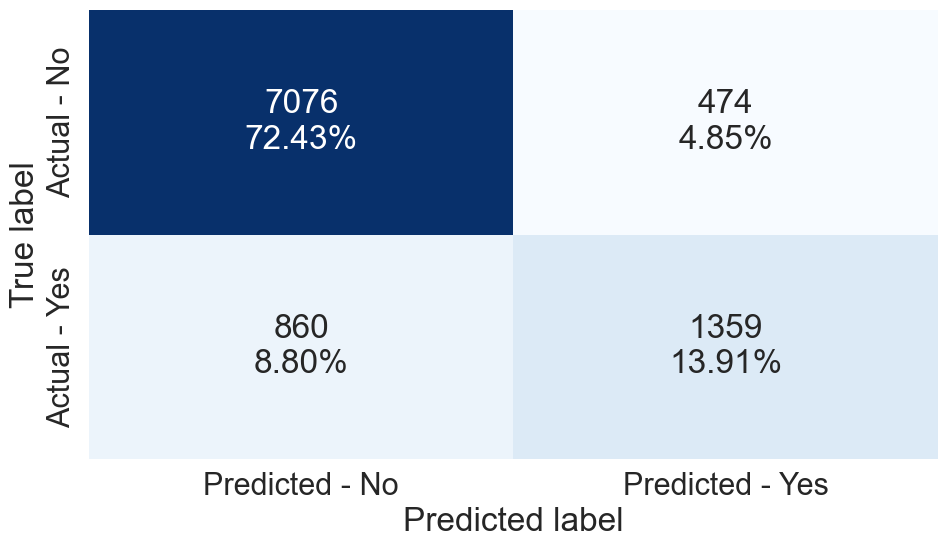

In [92]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=0)
adaboost.fit(X_train, y_train)

evaluate_model("AdaBoost", adaboost, X_train, y_train, X_test, y_test)

# Tuned AdaBoost



 Performance: Tuned AdaBoost
--------------------------------------------------
Metric       Train      Test      
--------------------------------
Accuracy     0.88       0.88      
Precision    0.79       0.75      
Recall       0.68       0.67      
F1 Score     0.73       0.71      


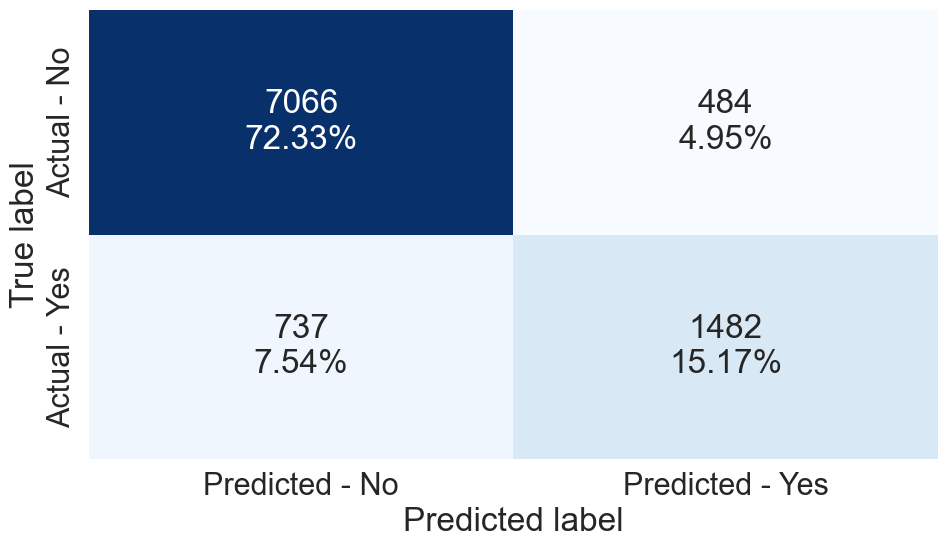

In [93]:
tuned_adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=0.8,
    algorithm='SAMME.R',
    random_state=0
)

tuned_adaboost.fit(X_train, y_train)
evaluate_model("Tuned AdaBoost", tuned_adaboost, X_train, y_train, X_test, y_test)

# Modified AdaBoost heatmap to match color scheme of poster (code below) ⬇️

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\mnt\\data\\confusion_matrix_mixed_text_color.png'

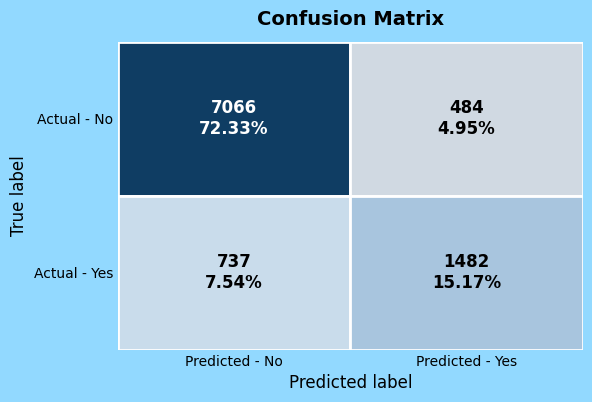

In [ ]:


import matplotlib.pyplot as plt
import numpy as np

# === Confusion Matrix Data ===
conf_matrix = np.array([[7066, 484],
                        [737, 1482]])

# Cell background colors
colors = np.array([["#0F3D63", "#D0D9E2"],
                   ["#C9DCEB", "#A8C5DE"]])

# Text colors (white for top-left, black for others)
text_colors = np.array([["white", "black"],
                        ["black", "black"]])

# Labels inside the boxes
labels = np.array([["7066\n72.33%", "484\n4.95%"],
                   ["737\n7.54%", "1482\n15.17%"]])

# === Plot ===
fig, ax = plt.subplots(figsize=(6, 4))
fig.patch.set_facecolor("#92d9ff")
ax.set_facecolor("#92d9ff")

# Draw custom boxes and text
for i in range(2):
    for j in range(2):
        rect = plt.Rectangle([j, i], 1, 1, facecolor=colors[i, j],
                             edgecolor='white', linewidth=2)
        ax.add_patch(rect)
        ax.text(j + 0.5, i + 0.5, labels[i, j],
                ha='center', va='center', fontsize=12,
                fontweight='bold', color=text_colors[i, j])

# === Formatting ===
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.invert_yaxis()
ax.set_xticks([0.5, 1.5])
ax.set_yticks([0.5, 1.5])
ax.set_xticklabels(["Predicted - No", "Predicted - Yes"], fontsize=10)
ax.set_yticklabels(["Actual - No", "Actual - Yes"], fontsize=10)
ax.set_title("Confusion Matrix", fontsize=14, fontweight='bold', pad=12)
ax.tick_params(axis='both', which='both', length=0)

# Remove grid lines and box
for spine in ax.spines.values():
    spine.set_visible(False)

ax.grid(False)
ax.set_xlabel("Predicted label", fontsize=12)
ax.set_ylabel("True label", fontsize=12)

# Save final image
output_path = "/mnt/data/confusion_matrix_mixed_text_color.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()

output_path


# Gradient Boosting
Gradient Boosting builds trees sequentially, but instead of reweighting like AdaBoost, it fits each new model to the residual errors of the previous one using a gradient descent approach. It often yields better accuracy than AdaBoost.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html


 Performance: Gradient Boosting
--------------------------------------------------
Metric       Train      Test      
--------------------------------
Accuracy     0.87       0.87      
Precision    0.80       0.76      
Recall       0.61       0.61      
F1 Score     0.70       0.68      


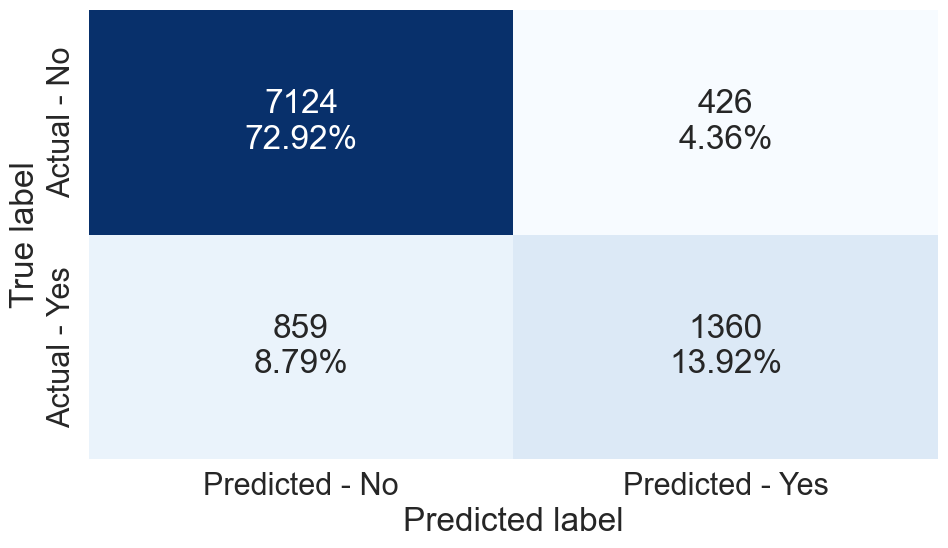

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
evaluate_model("Gradient Boosting", gb, X_train, y_train, X_test, y_test)

# Tuned Gradient Boosting



 Performance: Tuned Gradient Boosting
--------------------------------------------------
Metric       Train      Test      
--------------------------------
Accuracy     0.86       0.87      
Precision    0.80       0.76      
Recall       0.59       0.59      
F1 Score     0.68       0.67      


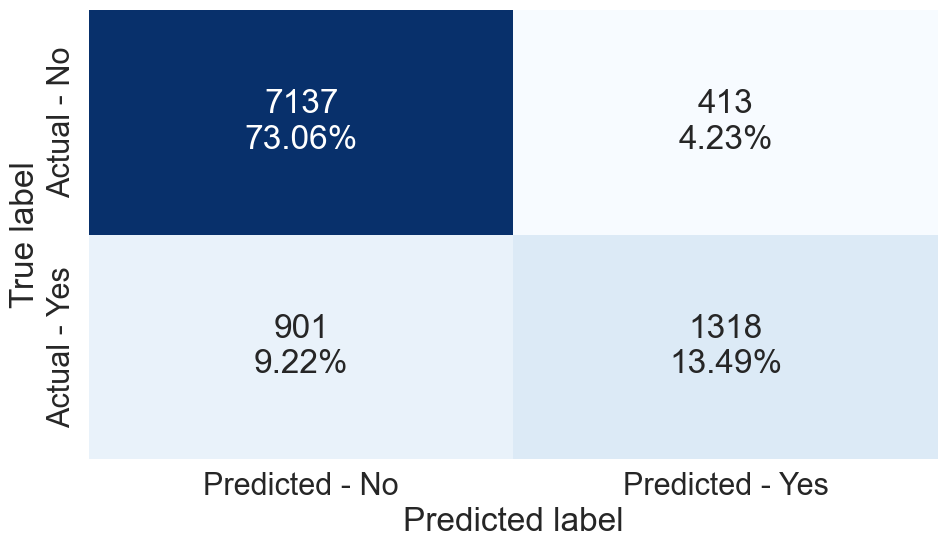

In [95]:
tuned_gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    max_features='sqrt',
    random_state=0
)
tuned_gb.fit(X_train, y_train)
evaluate_model("Tuned Gradient Boosting", tuned_gb, X_train, y_train, X_test, y_test)

# XGBoost
XGBoost is a highly optimized implementation of gradient boosting with regularization, parallel computation, and missing value handling built in. It usually performs better and faster than Gradient Boosting.

https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier

In [97]:
!pip install xgboost
from xgboost import XGBClassifier

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 6.1 MB/s eta 0:00:25
    --------------------------------------- 2.1/150.0 MB 5.3 MB/s eta 0:00:28
    --------------------------------------- 3.7/150.0 MB 6.1 MB/s eta 0:00:25
   - -------------------------------------- 4.5/150.0 MB 5.5 MB/s eta 0:00:27
   - -------------------------------------- 5.2/150.0 MB 5.1 MB/s eta 0:00:29
   - -------------------------------------- 6.6/150.0 MB 5.2 MB/s eta 0:00:28
   -- ------------------------------------- 7.9/150.0 MB 5.4 MB/s eta 0:00:27
   -- ------------------------------------- 9.7/150.0 MB 5.8 MB/s eta 0:00:25
   --- ------------------------------------ 11.3/150.0 MB 6.0 MB/s eta 0:00:24
   --- ------------------------------------ 13.1/150.0 MB 6.2 MB/s eta 0:00:22
   ---- ----------------------------------- 15.2/150.0 MB 6.5 MB/s eta 0:00:21
   ---- ----------------------------------- 17.3/150.0 MB 6.9 MB/s e


 Performance: XGBoost (Default)
--------------------------------------------------
Metric       Train      Test      
--------------------------------
Accuracy     0.91       0.87      
Precision    0.86       0.74      
Recall       0.76       0.67      
F1 Score     0.81       0.71      


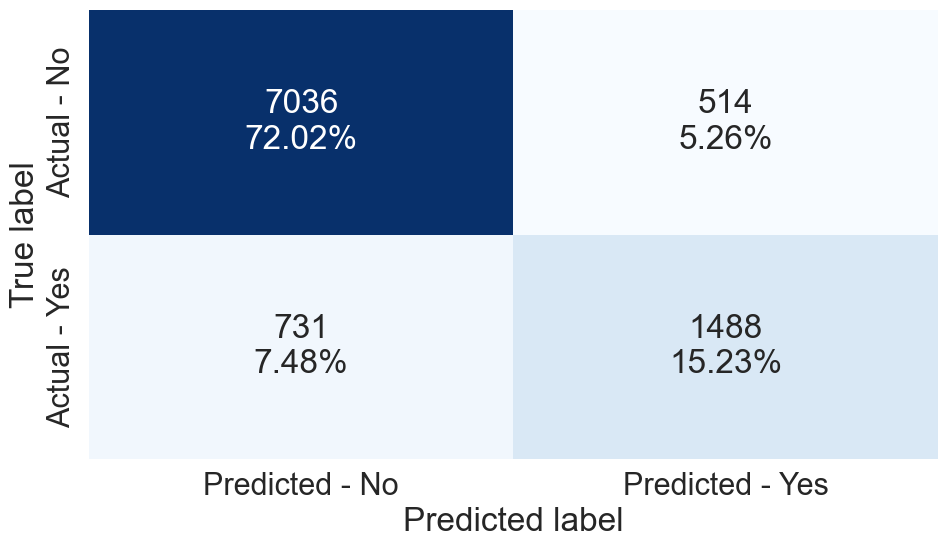

In [98]:
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=0
)
xgb.fit(X_train, y_train)
evaluate_model("XGBoost (Default)", xgb, X_train, y_train, X_test, y_test)

# Tuned XGBoost



 Performance: XGBoost (Tuned)
--------------------------------------------------
Metric       Train      Test      
--------------------------------
Accuracy     0.88       0.87      
Precision    0.81       0.76      
Recall       0.68       0.66      
F1 Score     0.74       0.70      


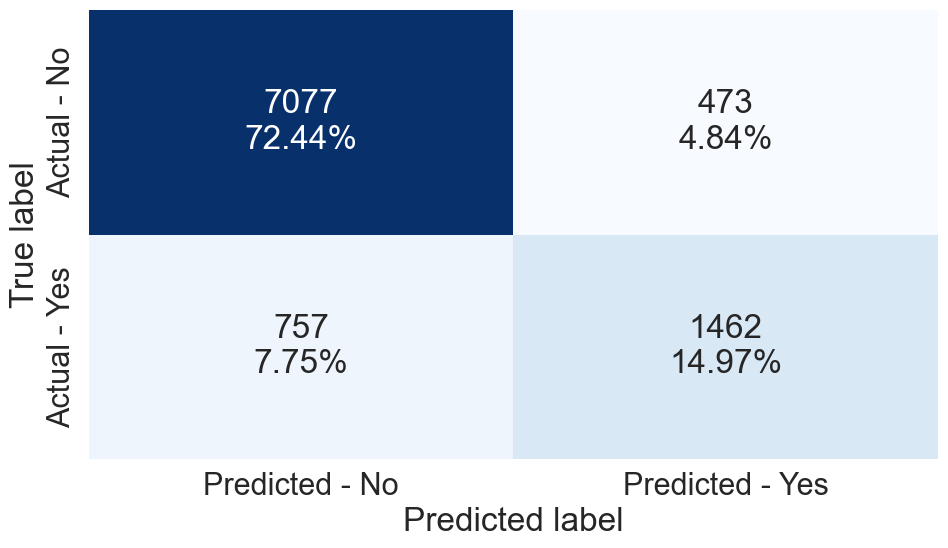

In [99]:
tuned_xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.5,
    reg_lambda=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=0
)
tuned_xgb.fit(X_train, y_train)
evaluate_model("XGBoost (Tuned)", tuned_xgb, X_train, y_train, X_test, y_test)

# Create expanded comparison table


In [101]:
# Identify all models to compare
models = [
    dtree_estimator,
    dtree_tuned,
    bagging_classifier,
    bagging_tuned,
    rf_estimator,
    rf_tuned,
    log_reg,
    adaboost,
    tuned_adaboost,
    gb,
    tuned_gb,
    xgb,
    tuned_xgb
]

In [102]:
# List of model names (must match order of models above)
model_names = [
    'Decision Tree',
    'Tuned Decision Tree',
    'Bagging Classifier',
    'Tuned Bagging Classifier',
    'Random Forest',
    'Tuned Random Forest',
    'Logistic Regression',
    'Support Vector Machine',
    'AdaBoost',
    'Tuned AdaBoost',
    'Gradient Boosting',
    'Tuned Gradient Boosting',
    'XGBoost',
    'Tuned XGBoost'
]

In [103]:
# Clear the lists
acc_train, acc_test = [], []
recall_train, recall_test = [], []
precision_train, precision_test = [], []
f1_train, f1_test = [], []
final_model_names = []

In [104]:
def get_metrics_score(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)

    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)

    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)

    return [
        acc_train, acc_test,
        recall_train, recall_test,
        precision_train, precision_test,
        f1_train, f1_test
    ]

In [105]:
model_data_map = {
    "Logistic Regression": (X_train_scaled, X_test_scaled),
    "Support Vector Machine": (X_train_scaled, X_test_scaled),
    # others use unscaled
}

In [106]:
# Initialize this too!
final_model_names = []

for model, name in zip(models, model_names):
    if model is None:
        continue

    # Use scaled data if defined for that model
    X_tr, X_te = model_data_map.get(name, (X_train, X_test))

    scores = get_metrics_score(model, X_tr, y_train, X_te, y_test)

    acc_train.append(scores[0])
    acc_test.append(scores[1])
    recall_train.append(scores[2])
    recall_test.append(scores[3])
    precision_train.append(scores[4])
    precision_test.append(scores[5])
    f1_train.append(scores[6])
    f1_test.append(scores[7])
    final_model_names.append(name)

In [107]:
print("Lengths:", len(final_model_names), len(acc_train), len(acc_test), len(f1_test))


Lengths: 13 13 13 13


In [109]:
comparison_frame = pd.DataFrame({
    'Model': final_model_names,
    'Train_Accuracy': acc_train,
    'Test_Accuracy': acc_test,
    'Train_Recall': recall_train,
    'Test_Recall': recall_test,
    'Train_Precision': precision_train,
    'Test_Precision': precision_test,
    'Train_F1': f1_train,
    'Test_F1': f1_test
})

comparison_frame_sorted = comparison_frame.sort_values(by='Test_Precision', ascending=False) # Sort by most important metric

# Display the table
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
print(comparison_frame_sorted)

                       Model  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1  Test_F1
9             Tuned AdaBoost           0.868          0.868         0.612        0.613            0.805           0.761     0.695    0.679
10         Gradient Boosting           0.862          0.865         0.589        0.594            0.799           0.761     0.678    0.667
12                   XGBoost           0.880          0.874         0.675        0.659            0.808           0.756     0.736    0.704
8                   AdaBoost           0.876          0.875         0.676        0.668            0.789           0.754     0.728    0.708
11   Tuned Gradient Boosting           0.911          0.873         0.764        0.671            0.860           0.743     0.809    0.705
3   Tuned Bagging Classifier           0.997          0.865         0.990        0.639            0.997           0.732     0.994    0.683
4              Random Fores